In [1]:
import pandas as pd
import numpy as np
from statistics import mean

In [2]:
maindata = pd.read_csv("zipcode_coded.csv")
maindata.columns

Index(['Fiscal Year', 'Mutated MRN', 'Diabetes (Y/N)', 'Meth/Cocaine use(Y/N)',
       'Readmitted (Y/N)', 'HDP Diagnosis (readmission episode) or NA',
       'Delivery Date', 'Readmission date', 'Age', 'BMI prepregnancy',
       'BMI close to delivery', 'On HDP meds at dc from birth episode (Y/N)',
       'If Y, how many?', 'Betablocker dose at dc', 'Nifedipine dose at dc',
       'Other meds at dc', 'Notes', 'ZIPCODE', 'Zipcode_last4', 'ZIP_4',
       'c-section', 'vaginal', 'AA', 'Asian', 'Declined', 'Hispanic',
       'Middle Eastern', 'Mixed (Asian, White)', 'Mixed (Asian, White, AA)',
       'Other', 'White', 'A1GDM', 'A2GDM', 'N_Diabetes', 'T1', 'T1DM', 'T2DM',
       'Preterm', 'Term', 'No Induction', 'Yes Induction', 'Multiple',
       'Singleton', 'N_Multips', 'Y_Multips', 'N_HDP Diag', 'Y_HDP Diag',
       'No Episode', 'chronic hypertension', 'gestational hypertension',
       'none', 'preeclampsia with SF', 'preeclampsia without SF',
       'superimposed with SF', 'superim

In [3]:
maindata.isna().sum()

Fiscal Year                                     0
Mutated MRN                                     0
Diabetes (Y/N)                                  0
Meth/Cocaine use(Y/N)                           0
Readmitted (Y/N)                                0
HDP Diagnosis (readmission episode) or NA     269
Delivery Date                                   0
Readmission date                              268
Age                                            78
BMI prepregnancy                               80
BMI close to delivery                          79
On HDP meds at dc from birth episode (Y/N)     79
If Y, how many?                               265
Betablocker dose at dc                        312
Nifedipine dose at dc                         290
Other meds at dc                              338
Notes                                         259
ZIPCODE                                        78
Zipcode_last4                                 228
ZIP_4                                         228


In [4]:
cal_sdoh = pd.read_csv("cal_sdoh_useful.csv")
cal_sdoh=cal_sdoh.drop(['Unnamed: 0'],axis=1)

In [4]:
maindata

,Fiscal Year,Mutated MRN,Diabetes (Y/N),Meth/Cocaine use(Y/N),Readmitted (Y/N),HDP Diagnosis (readmission episode) or NA,Delivery Date,Readmission date,Age,BMI prepregnancy,...,chronic hypertension,gestational hypertension,none,preeclampsia with SF,preeclampsia without SF,superimposed with SF,superimposed with SF w/ SF,superimposed without SF,N_ECG,Y_ECG
0,2021,7887439,1,0,Y,preeclampsia with SF,2021-07-04,2021-07-08 00:00:00,38.0,28.1,...,False,True,False,False,False,False,False,False,False,True
1,2021,2392172,0,0,Y,preeclampsia with SF,2021-07-06,2021-07-12 00:00:00,34.0,24.3,...,False,False,False,True,False,False,False,False,False,True
2,2021,1252118,0,0,Y,preeclampsia with SF,2021-07-22,2021-07-29 00:00:00,31.0,20.3,...,False,False,False,False,False,False,False,False,False,True
3,2021,7872701,1,0,Y,superimposed with SF,2021-08-03,2021-08-12 00:00:00,33.0,28.3,...,False,False,False,False,False,True,False,False,True,False
4,2021,7954972,1,0,Y,preeclampsia with SF,2021-08-06,2021-08-14 00:00:00,44.0,unknown,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,2023,8093931,1,0,N,NaN,2023-05-28,NaN,29.0,49.45,...,False,True,False,False,False,False,False,False,True,False
341,2023,8105947,1,0,N,NaN,2023-05-30,NaN,38.0,44.39,...,False,True,False,False,False,False,False,False,True,False
342,2023,7662725,0,0,N,NaN,2023-05-30,NaN,29.0,21.37,...,True,False,False,False,False,False,False,False,True,False
343,2023,8351519,0,0,N,NaN,2023-05-31,NaN,37.0,32.92,...,False,True,False,False,False,False,False,False,True,False


In [5]:
maindata['Other meds at dc'].value_counts()

amlodipine 10mg daily                                                               1
enalapril 20 daily                                                                  1
hydralazine 50 mg TID, HCTZ 12.5 mg daily, enalapril 10mg BID, lasix 20 mg daily    1
metoprolol tartrate 100 mg BID                                                      1
lisinopril 10mg daily                                                               1
readmitted for breast abscess                                                       1
benzapril 10 BID                                                                    1
Name: Other meds at dc, dtype: int64

In [6]:
print(maindata['Betablocker dose at dc'].unique())
maindata.loc[maindata[maindata['Betablocker dose at dc'].isna()==True].index,'Betablocker dose at dc']=0
maindata.loc[maindata[maindata['Betablocker dose at dc'].str.contains('25')==True].index,'Betablocker dose at dc']=25

maindata.loc[maindata[maindata['Betablocker dose at dc'].str.contains('100 BID')==True].index,'Betablocker dose at dc']=100*2
maindata.loc[maindata[maindata['Betablocker dose at dc'].str.contains('200 BID')==True].index,'Betablocker dose at dc']=200*2
maindata.loc[maindata[maindata['Betablocker dose at dc'].str.contains('300 BID')==True].index,'Betablocker dose at dc']=300*2
maindata.loc[maindata[maindata['Betablocker dose at dc'].str.contains('400 BID')==True].index,'Betablocker dose at dc']=400*2
maindata.loc[maindata[maindata['Betablocker dose at dc'].str.contains('600 BID')==True].index,'Betablocker dose at dc']=600*2

maindata.loc[maindata[maindata['Betablocker dose at dc'].str.contains('200 TID')==True].index,'Betablocker dose at dc']=200*3
maindata.loc[maindata[maindata['Betablocker dose at dc'].str.contains('300 TID')==True].index,'Betablocker dose at dc']=300*3
maindata.loc[maindata[maindata['Betablocker dose at dc'].str.contains('400 TID')==True].index,'Betablocker dose at dc']=400*3
maindata.loc[maindata[maindata['Betablocker dose at dc'].str.contains('600 TID')==True].index,'Betablocker dose at dc']=600*3
maindata.loc[maindata[maindata['Betablocker dose at dc'].str.contains('800 TID')==True].index,'Betablocker dose at dc']=800*3
maindata.loc[maindata[maindata['Betablocker dose at dc'].str.contains('800 mg TID')==True].index,'Betablocker dose at dc']=800*3


print(maindata['Betablocker dose at dc'].unique())




[nan '400 TID' '200 BID' '100 BID' '400 BID' '200 TID' '300 TID'
 'Metoprolol 25 daily' '600 BID' '800 mg TID' '600 TID' '800 TID'
 '300 BID']
[   0 1200  400  200  800  600  900   25 2400 1800]


In [7]:
print(maindata['Nifedipine dose at dc'].unique())
maindata.loc[maindata[maindata['Nifedipine dose at dc'].isna()==True].index,'Nifedipine dose at dc']=0
maindata.loc[maindata[maindata['Nifedipine dose at dc'].str.contains('30 AM, 60 PM')==True].index,'Nifedipine dose at dc']=30+60

maindata.loc[maindata[maindata['Nifedipine dose at dc'].str.contains('30 daily')==True].index,'Nifedipine dose at dc']=30
maindata.loc[maindata[maindata['Nifedipine dose at dc'].str.contains('30 BID')==True].index,'Nifedipine dose at dc']=60

maindata.loc[maindata[maindata['Nifedipine dose at dc'].str.contains('60 daily')==True].index,'Nifedipine dose at dc']=60
maindata.loc[maindata[maindata['Nifedipine dose at dc'].str.contains('60 BID')==True].index,'Nifedipine dose at dc']=120

print(maindata['Nifedipine dose at dc'].unique())





#assuming 30 bid 30 daily and 30 am means same, similalrly with 60


[nan '30 BID' '30 daily' '60 daily' '60 BID' '30 AM, 60 PM']
[  0  60  30 120  90]


In [8]:
"""'Betablocker dose at dc', 'Nifedipine dose at dc', 'Other meds at dc','Notes',"""

maindata.loc[maindata[maindata['Other meds at dc'].isna()==True].index,'Other meds at dc']=0
maindata.loc[maindata[maindata['Other meds at dc'].isna()==False].index,'Other meds at dc']=1

In [9]:
maindata['Betablocker dose at dc']

0         0
1         0
2         0
3      1200
4         0
       ... 
340       0
341       0
342       0
343       0
344       0
Name: Betablocker dose at dc, Length: 345, dtype: int64

In [10]:

maindata = maindata.drop(['Mutated MRN','Notes'],axis=1)

In [11]:
#dropping readmission and delivery date colm since we have to predict readmission
#also dropping 'HDP Diagnosis (readmission episode) or NA
maindata = maindata.drop([ 'Delivery Date','Readmission date'],axis=1)

maindata = maindata.drop(['HDP Diagnosis (readmission episode) or NA'],axis=1)


In [12]:
# temp_one_hot = pd.get_dummies(maindata['HDP Diagnosis (delivery episode)'])
# maindata = maindata.drop('HDP Diagnosis (delivery episode)',axis = 1)
# # Join the encoded df
# maindata = maindata.join(temp_one_hot)

In [13]:
maindata.loc[maindata[maindata['Readmitted (Y/N)']=='N'].index,'Readmitted (Y/N)']=0
maindata.loc[maindata[maindata['Readmitted (Y/N)']=='Y'].index,'Readmitted (Y/N)']=1


In [14]:
maindata = maindata.drop(maindata[maindata['ZIPCODE'].isna()]['Readmitted (Y/N)'].index)


In [15]:
maindata['ZIPCODE'].isna().sum()

0

In [16]:
print(len(maindata[maindata['Readmitted (Y/N)']==0])-len(maindata[maindata['Readmitted (Y/N)']==1])
)

119


In [17]:
print(len(maindata[maindata['Readmitted (Y/N)']==0]),len(maindata[maindata['Readmitted (Y/N)']==1]),193-74)

193 74 119


In [18]:
np.random.seed(10)
len(maindata[maindata['Readmitted (Y/N)']==0])-len(maindata[maindata['Readmitted (Y/N)']==1])
#197
remove_n = 119
drop_indices = np.random.choice(maindata[maindata['Readmitted (Y/N)']==0].index, remove_n, replace=False)
maindata = maindata.drop(drop_indices)
maindata=maindata.reset_index(drop=True)

In [23]:
print(len(maindata))

148


In [24]:

train_set = maindata.sample(frac=0.7)

#HOLD OUT TEST SET
# for testing on unseen data
test_set = maindata.loc[~maindata.index.isin(train_set.index)]

train_set=train_set.reset_index(drop=True)
test_set =test_set.reset_index(drop=True)
# train_x =  whole_cohot_ehr.loc[:, :]
train_x = train_set.loc[:, train_set.columns != 'Readmitted (Y/N)']
# train_x = train_x[train_x.deidentified_study_id<150].reset_index(drop=True)
train_y = train_set['Readmitted (Y/N)']#
# train_y = train_y[train_y.deidentified_study_id<150].reset_index(drop=True)

test_x = test_set.loc[:, test_set.columns != 'Readmitted (Y/N)']
# train_x = train_x[train_x.deidentified_study_id<150].reset_index(drop=True)
test_y = test_set['Readmitted (Y/N)']#


For the sake of this experiment, we replace all nan values with -1



In [25]:
print(train_y)
print(len(train_y[train_y==0]),len(train_y[train_y==1]),271-197)
print(len(test_y[test_y==0]),len(test_y[test_y==1]),271-197)

0      1
1      0
2      0
3      0
4      0
      ..
99     0
100    0
101    1
102    0
103    1
Name: Readmitted (Y/N), Length: 104, dtype: int64
53 51 74
21 23 74


In [19]:
def _get_kfolds_when_train_test_equal( x,y, folds, is_random):
        """
        Get indices for train and test kfold data assuming that number of patients in the training
        cohort is equivalent to number of patients in testing. For cases in normal kfold where we
        are just iterating over the entire dataset this will be true.

        Gathers a list of patients and splits them by pathophysiology. Then just takes a continuous
        kfold split of them.
        """

        
        idxs = []
        pathos = {0:'Not readmitted',1:'Readmitted'}
        mapping = {patho: [] for n, patho in pathos.items()}
        samples = deepcopy(x)
        
        if is_random:
            samples.sample(frac=1)
        
        # print(samples)                                                                                            
        for idx,*patient in samples.itertuples():
            
            type_ = pathos[y.loc[idx]]
            mapping[type_].append(idx)
            
        for i in range(folds):
            test_pts = []
            train_pts = []
            for k, v in mapping.items():
                # print("######",k,v)
                lower_bound = int(round(i * len(v) / float(folds)))
                upper_bound = int(round((i + 1) * len(v) / float(folds)))
                if upper_bound < 1:
                    raise Exception("You do not have enough patients for {} cohort".format(k))
                # print(lower_bound,upper_bound)
                patients = v[lower_bound:upper_bound]
                # print(patients,test_pts)
                test_pts.extend(patients)
            # train_pts = x.index - test_pts
            train_pts = set(x.index).difference(test_pts)
            train_pts = list(train_pts)
            test_pts = set(test_pts)
            test_pts = list(test_pts) 

            print("-----> K-Fold train and test size <-----")
            print(len(train_pts),len(test_pts))
            print()
            # train_pt_data = x[x.deidentified_study_id.isin(train_pts)]
            # test_pt_data = x[x.deidentified_study_id.isin(test_pts)]
            print(type(train_pts),type(test_pts))
            idxs.append((train_pts, test_pts))
        
        return idxs

In [70]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix,classification_report,roc_curve,precision_recall_curve,auc
from prettytable import PrettyTable


def get_metrics(test_y,predictions,table,fold):

    report = classification_report(test_y, predictions,output_dict=True)
    fpr, tpr, thresholds = roc_curve(test_y, predictions, pos_label=1)
    precision, recall, thresholds = precision_recall_curve(test_y, predictions,pos_label=1)

    auc_score = auc(fpr, tpr)
    prauc_score = auc(recall, precision)
    print("AUC score is",auc_score,"PR-AUC score is",prauc_score)


    cm1 = confusion_matrix(test_y,predictions)
    #     print('Confusion Matrix : \n', cm1)

    total1=sum(sum(cm1))
    #####from confusion matrix calculate accuracy
    accuracy1=(cm1[0,0]+cm1[1,1])/total1
    print ('Accuracy : ', accuracy1)

    sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    print('Sensitivity : ', sensitivity1 )

    specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    print('Specificity : ', specificity1)

    

    #table.field_names = ["Fold","Class", "precision", "recall", "f-1 score","sensitivity","specificity","Accuracy of expt","AUC","PRAUC"]
    clss_lbl='0'
    table.add_row([fold, 'NO Readmissn', report[clss_lbl]['precision'],report[clss_lbl]['recall'],report[clss_lbl]['f1-score'],sensitivity1,specificity1,report['accuracy'], auc_score,prauc_score])

    clss_lbl='1'
    table.add_row([fold, 'Readmissn', report[clss_lbl]['precision'],report[clss_lbl]['recall'],report[clss_lbl]['f1-score'],sensitivity1,specificity1,report['accuracy'], auc_score,prauc_score])
    return table,accuracy1,auc_score,prauc_score

In [21]:
maindata=maindata.replace(to_replace = True, value = 1)
maindata=maindata.replace(to_replace = False, value = 0)


maindata

,Fiscal Year,Diabetes (Y/N),Meth/Cocaine use(Y/N),Readmitted (Y/N),Age,BMI prepregnancy,BMI close to delivery,On HDP meds at dc from birth episode (Y/N),"If Y, how many?",Betablocker dose at dc,...,chronic hypertension,gestational hypertension,none,preeclampsia with SF,preeclampsia without SF,superimposed with SF,superimposed with SF w/ SF,superimposed without SF,N_ECG,Y_ECG
0,2021,1,0,1,38.0,28.1,35.1,0.0,NaN,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2021,0,0,1,34.0,24.3,32.9,1.0,1.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2021,0,0,1,31.0,20.3,26,0.0,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2021,1,0,1,33.0,28.3,31.4,1.0,2.0,1200,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2021,1,0,1,44.0,unknown,29.2,0.0,NaN,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,2023,0,0,0,35.0,26.84,32.73,1.0,1.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
144,2023,0,0,0,28.0,29.1,32.91,0.0,NaN,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145,2023,0,0,1,29.0,unknown,unknown,1.0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
146,2023,1,0,0,29.0,49.45,48.34,0.0,NaN,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Missing vlaues treatment

In [29]:

train_set = maindata.sample(frac=0.7)

#HOLD OUT TEST SET
# for testing on unseen data
test_set = maindata.loc[~maindata.index.isin(train_set.index)]

train_set=train_set.reset_index(drop=True)
test_set =test_set.reset_index(drop=True)
# train_x =  whole_cohot_ehr.loc[:, :]
train_x = train_set.loc[:, train_set.columns != 'Readmitted (Y/N)']
# train_x = train_x[train_x.deidentified_study_id<150].reset_index(drop=True)
train_y = train_set['Readmitted (Y/N)']#
# train_y = train_y[train_y.deidentified_study_id<150].reset_index(drop=True)

test_x = test_set.loc[:, test_set.columns != 'Readmitted (Y/N)']
# train_x = train_x[train_x.deidentified_study_id<150].reset_index(drop=True)
test_y = test_set['Readmitted (Y/N)']#


In [58]:
# train_x=train_x.replace(to_replace = np.nan, value = -1000)
# test_x=test_x.replace(to_replace = np.nan, value = -1000)

# train_x = train_x.replace(to_replace = 'NaN', value = -1000)
# test_x = test_x.replace(to_replace = 'NaN', value = -1000)

train_x=train_x.replace(to_replace ='unknown', value = np.nan)
test_x=test_x.replace(to_replace = 'unknown', value = np.nan)
maindata=maindata.replace(to_replace = 'unknown', value = np.nan)
maindata = maindata.replace(to_replace = 'NaN', value = np.nan)

train_x=train_x.replace(to_replace ='unkown', value = np.nan)
test_x=test_x.replace(to_replace = 'unkown', value = np.nan)
maindata=maindata.replace(to_replace = 'unkown', value = np.nan)


In [31]:
train_x_nan = train_x.isna().sum()
test_x_nan = test_x.isna().sum()
maindata_nan = maindata.isna().sum()

In [32]:
print("train x",train_x_nan,"test x",test_x_nan,",maindata",maindata_nan,sep="\n\n")

train x

Fiscal Year                                    0
Diabetes (Y/N)                                 0
Meth/Cocaine use(Y/N)                          0
Age                                            0
BMI prepregnancy                              28
BMI close to delivery                          2
On HDP meds at dc from birth episode (Y/N)     0
If Y, how many?                               67
Betablocker dose at dc                         0
Nifedipine dose at dc                          0
Other meds at dc                               0
ZIPCODE                                        0
Zipcode_last4                                 50
ZIP_4                                         50
c-section                                      0
vaginal                                        0
AA                                             0
Asian                                          0
Declined                                       0
Hispanic                                       0
Middle East

In [22]:
print(maindata['On HDP meds at dc from birth episode (Y/N)'])
#Question for Dr lihong : Should we impute missing values here with average or with -1000 or with 0??

0      0.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
143    1.0
144    0.0
145    1.0
146    0.0
147    0.0
Name: On HDP meds at dc from birth episode (Y/N), Length: 148, dtype: float64


In [23]:
"""Missing values in maindata

Age                                            23 # Impute with mean or median or min or max
BMI prepregnancy                               25 # Impute with mean or median or min or max
BMI close to delivery                          24 # Impute with mean or median or min or max
On HDP meds at dc from birth episode (Y/N)     23 #Should we impute missing values here with average or with -1000 or with 0??
If Y, how many?                               117 # Impute with 0
ZIPCODE                                        23 # Drop these rows in SDOH analysis BECAUSE ALL OF THESE WERE NOT READMITTED SAMPLES, but try imputing with mean or median or min or max here
Zipcode_last4                                  88
ZIP_4                                          88

"""

'Missing values in maindata\n\nAge                                            23 # Impute with mean or median or min or max\nBMI prepregnancy                               25 # Impute with mean or median or min or max\nBMI close to delivery                          24 # Impute with mean or median or min or max\nOn HDP meds at dc from birth episode (Y/N)     23 #Should we impute missing values here with average or with -1000 or with 0??\nIf Y, how many?                               117 # Impute with 0\nZIPCODE                                        23 # Drop these rows in SDOH analysis BECAUSE ALL OF THESE WERE NOT READMITTED SAMPLES, but try imputing with mean or median or min or max here\nZipcode_last4                                  88\nZIP_4                                          88\n\n'

In [64]:
maindata['Age']=maindata['Age'].replace(to_replace =np.nan, value = maindata['Age'].mean())
print(maindata['BMI prepregnancy'].unique())
# maindata['BMI prepregnancy'] =maindata['BMI prepregnancy'].str.strip()
# maindata['BMI prepregnancy'] =maindata['BMI prepregnancy'].astype('float')
maindata['BMI prepregnancy'] = pd.to_numeric(maindata['BMI prepregnancy'])
maindata['BMI prepregnancy']=maindata['BMI prepregnancy'].fillna(maindata['BMI prepregnancy'].mean())

maindata['BMI close to delivery'] = pd.to_numeric(maindata['BMI close to delivery'])
maindata['BMI close to delivery']=maindata['BMI close to delivery'].fillna(maindata['BMI close to delivery'].mean())
# maindata['BMI close to delivery']=maindata['BMI close to delivery'].replace(to_replace =np.nan, value = maindata['BMI close to delivery'].mean())

maindata['If Y, how many?']=maindata['If Y, how many?'].replace(to_replace =np.nan, value = 0)


[28.1        24.3        20.3        28.3        30.95711712 29.6
 24.6        27.8        24.         85.         23.4        48.1
 19.3        33.4        21.8        22.7        22.6        22.3
 29.         40.         43.4        26.8        33.9        26.1
 25.2        28.4        36.4        37.6        25.9        22.2
 23.         24.1        22.8        29.8        21.4        20.7
 20.2        44.1        33.         20.9        22.         21.2
 46.8        64.5        32.3        28.         24.7        21.3
 29.4        42.         31.8        16.5        36.         21.5
 25.         44.         45.6        54.3        38.1        35.
 30.         24.5        40.7        34.1        35.6        37.1
 25.6        28.6        24.9        60.5        52.6        33.2
 23.5        44.5        32.7        23.8        25.7        30.3
 26.9        47.9        23.2        32.1        19.2        32.9
 20.1        30.5        41.2        45.23       25.03       31.21
 30.93    

In [42]:
maindata['On HDP meds at dc from birth episode (Y/N)']=maindata['On HDP meds at dc from birth episode (Y/N)'].replace(to_replace =np.nan, value = -1000)


In [43]:
maindata_nan = maindata.isna().sum()
print(maindata_nan)

Fiscal Year                                   0
Diabetes (Y/N)                                0
Meth/Cocaine use(Y/N)                         0
Readmitted (Y/N)                              0
Age                                           0
BMI prepregnancy                              0
BMI close to delivery                         0
On HDP meds at dc from birth episode (Y/N)    0
If Y, how many?                               0
Betablocker dose at dc                        0
Nifedipine dose at dc                         0
Other meds at dc                              0
ZIPCODE                                       0
Zipcode_last4                                 0
ZIP_4                                         0
c-section                                     0
vaginal                                       0
AA                                            0
Asian                                         0
Declined                                      0
Hispanic                                

In [44]:
maindata['ZIPCODE']=maindata['ZIPCODE'].fillna(-1000)
maindata['Zipcode_last4']=maindata['Zipcode_last4'].fillna(-1000)
maindata['ZIP_4']=maindata['ZIP_4'].fillna(-1000)

In [45]:
maindata

,Fiscal Year,Diabetes (Y/N),Meth/Cocaine use(Y/N),Readmitted (Y/N),Age,BMI prepregnancy,BMI close to delivery,On HDP meds at dc from birth episode (Y/N),"If Y, how many?",Betablocker dose at dc,...,chronic hypertension,gestational hypertension,none,preeclampsia with SF,preeclampsia without SF,superimposed with SF,superimposed with SF w/ SF,superimposed without SF,N_ECG,Y_ECG
0,2021,1,0,1,38.0,28.100000,35.100000,0.0,0.0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2021,0,0,1,34.0,24.300000,32.900000,1.0,1.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2021,0,0,1,31.0,20.300000,26.000000,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2021,1,0,1,33.0,28.300000,31.400000,1.0,2.0,1200,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2021,1,0,1,44.0,30.957117,29.200000,0.0,0.0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,2023,0,0,0,35.0,26.840000,32.730000,1.0,1.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
144,2023,0,0,0,28.0,29.100000,32.910000,0.0,0.0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145,2023,0,0,1,29.0,30.957117,36.124414,1.0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
146,2023,1,0,0,29.0,49.450000,48.340000,0.0,0.0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [46]:
print(len(maindata[maindata['Readmitted (Y/N)']==0])-len(maindata[maindata['Readmitted (Y/N)']==1]))


0


# Using treated missing values for modeling

In [47]:
# np.random.seed(10)
# len(maindata[maindata['Readmitted (Y/N)']==0])-len(maindata[maindata['Readmitted (Y/N)']==1])
# #197
# remove_n = 197
# drop_indices = np.random.choice(maindata[maindata['Readmitted (Y/N)']==0].index, remove_n, replace=False)
# maindata = maindata.drop(drop_indices)
# maindata=maindata.reset_index(drop=True)


train_set = maindata.sample(frac=0.7)

#HOLD OUT TEST SET
# for testing on unseen data
test_set = maindata.loc[~maindata.index.isin(train_set.index)]

train_set=train_set.reset_index(drop=True)
test_set =test_set.reset_index(drop=True)
# train_x =  whole_cohot_ehr.loc[:, :]
train_x = train_set.loc[:, train_set.columns != 'Readmitted (Y/N)']
# train_x = train_x[train_x.deidentified_study_id<150].reset_index(drop=True)
train_y = train_set['Readmitted (Y/N)']#
# train_y = train_y[train_y.deidentified_study_id<150].reset_index(drop=True)

test_x = test_set.loc[:, test_set.columns != 'Readmitted (Y/N)']
# train_x = train_x[train_x.deidentified_study_id<150].reset_index(drop=True)
test_y = test_set['Readmitted (Y/N)']#


In [48]:
print(len(train_set),len(test_set))

104 44


In [49]:


# train_x=train_x.replace(to_replace ='unknown', value = np.nan)
# test_x=test_x.replace(to_replace = 'unknown', value = np.nan)

# train_x = train_x.replace(to_replace = 'NaN', value = np.nan)
# test_x = test_x.replace(to_replace = 'NaN', value = np.nan)

# train_x=train_x.replace(to_replace ='unkown', value = np.nan)
# test_x=test_x.replace(to_replace = 'unkown', value = np.nan)



In [50]:

# train_x['Age']=train_x['Age'].replace(to_replace =np.nan, value = train_x['Age'].mean())
# print(train_x['BMI prepregnancy'].unique())
# # train_x['BMI prepregnancy'] =train_x['BMI prepregnancy'].str.strip()

# train_x['BMI prepregnancy'] = pd.to_numeric(train_x['BMI prepregnancy'])
# train_x['BMI prepregnancy']=train_x['BMI prepregnancy'].fillna(train_x['BMI prepregnancy'].mean())

# train_x['BMI close to delivery'] = pd.to_numeric(train_x['BMI close to delivery'])
# train_x['BMI close to delivery']=train_x['BMI close to delivery'].fillna(train_x['BMI close to delivery'].mean())

# train_x['If Y, how many?']=train_x['If Y, how many?'].replace(to_replace =np.nan, value = 0)


# train_x['On HDP meds at dc from birth episode (Y/N)']=train_x['On HDP meds at dc from birth episode (Y/N)'].replace(to_replace =np.nan, value = -1000)


# train_x['ZIPCODE']=train_x['ZIPCODE'].fillna(-1000)
# train_x['Zipcode_last4']=train_x['Zipcode_last4'].fillna(-1000)
# train_x['ZIP_4']=train_x['ZIP_4'].fillna(-1000)

In [51]:

# test_x['Age']=test_x['Age'].replace(to_replace =np.nan, value = test_x['Age'].mean())
# print(test_x['BMI prepregnancy'].unique())
# # test_x['BMI prepregnancy'] =test_x['BMI prepregnancy'].str.strip()

# test_x['BMI prepregnancy'] = pd.to_numeric(test_x['BMI prepregnancy'])
# test_x['BMI prepregnancy']=test_x['BMI prepregnancy'].fillna(test_x['BMI prepregnancy'].mean())

# test_x['BMI close to delivery'] = pd.to_numeric(test_x['BMI close to delivery'])
# test_x['BMI close to delivery']=test_x['BMI close to delivery'].fillna(test_x['BMI close to delivery'].mean())

# test_x['If Y, how many?']=test_x['If Y, how many?'].replace(to_replace =np.nan, value = 0)


# test_x['On HDP meds at dc from birth episode (Y/N)']=test_x['On HDP meds at dc from birth episode (Y/N)'].replace(to_replace =np.nan, value = -1000)


# test_x['ZIPCODE']=test_x['ZIPCODE'].fillna(-1000)
# test_x['Zipcode_last4']=test_x['Zipcode_last4'].fillna(-1000)
# test_x['ZIP_4']=test_x['ZIP_4'].fillna(-1000)

In [37]:
from copy import deepcopy


#Cross validation sets for train and test
y = deepcopy(train_y)
x = deepcopy(train_x)
x=x.loc[:, ~x.columns.isin(['ZIP_4','Zipcode_last4','ZIPCODE','Fiscal Year'])]#'Mixed (Asian, White, AA)','Mixed (Asian, White)','Asian','AA','Hispanic','White','Middle Eastern'])]
# print(train_x)


In [52]:
from scipy.stats import ks_2samp
def statistical_filter(df,X,y, corr_th):
    #FOR PERFORMING STATISTICAL FEATURE SELECTION
    
    df_ks= pd.DataFrame(columns =('Features', 'KS score', 'p value'))
    def ks(feat1,feat2):
        d,p_val = ks_2samp(feat1,feat2)
        return d,p_val
    
    cohort = df.groupby(['Readmitted (Y/N)'])
    cols = X.columns
    for feat in cols:
        d,p_val = ks(cohort.get_group(0)[feat],cohort.get_group(1)[feat])
        data_append = {'Features': [feat], 'KS score': [d], 'p value': [p_val]}
        df_ks = pd.concat([df_ks,pd.DataFrame(data=data_append)], ignore_index= True)
    df_ks_sorted = df_ks.sort_values('KS score', ascending=False)
    df_ks_sorted.reset_index(drop = True, inplace= True)
    cols_ML = df_ks_sorted[df_ks_sorted['p value']<=0.1]['Features'].values
    X_KS_filtered= X[cols_ML]


    correlated_features = pd.DataFrame(columns = ('Feature A', 'Feature B', 'Correlation values (-1 to +1)'))
    data_col =set()
    # data_file = 'Expert_abp_vent_large_data.csv'
    # X, y, df = get_dataset(data_file)
    correlation_matrix = X_KS_filtered.corr()
    for i in range(len(correlation_matrix.columns)):

        for j in range(i):
            #print(str(i) + '-'+ str(j))
            if abs(correlation_matrix.iloc[i, j]) > corr_th:
                colnameA = correlation_matrix.columns[i]
                colnameB = correlation_matrix.columns[j]
                indexA = np.where(cols_ML == colnameA)
                indexB = np.where(cols_ML == colnameB)
                if indexA < indexB:
                    
                    data_col.add(colnameB) ## to remove the feature with 
                else: 
                
                    data_col.add(colnameA)
                #data_col.add(colnameB)
                data = {'Feature A':[colnameA], 'Feature B': [colnameB], 'Correlation values (-1 to +1)':[correlation_matrix.iloc[i, j]] }
                correlated_features = pd.concat([correlated_features,pd.DataFrame(data=data)], ignore_index = True)

    colm_drop =list(data_col)
    df_corrFiltered = X_KS_filtered.drop(colm_drop, axis =1)
#     print('Number of reduced features: {}'.format(df_corrFiltered.shape[1]))
#    print(df_corrFiltered.columns)
    return df_corrFiltered.columns.tolist(),correlated_features,df_ks_sorted,X_KS_filtered

In [65]:
filtered_cols,correlated_features ,df_ks_sorted,df_ks_filtered= statistical_filter(train_set,x,y,0.9)


In [66]:
filtered_cols
# x=filterks.loc[:, ~filterks.columns.isin(['ZIP_4','Zipcode_last4','ZIPCODE','Mixed (Asian, White, AA)','Mixed (Asian, White)','Asian','AA','Hispanic','White','Middle Eastern','Fiscal Year'])]
# x
# y=maindata_with_adi['Readmitted (Y/N)']
# x

['BMI prepregnancy', 'BMI close to delivery']

In [67]:
df_ks_sorted

,Features,KS score,p value
0,BMI prepregnancy,0.332593,0.004553
1,BMI close to delivery,0.280000,0.026215
2,Nifedipine dose at dc,0.210370,0.168184
3,"If Y, how many?",0.200741,0.207284
4,On HDP meds at dc from birth episode (Y/N),0.179259,0.322773
5,N_HDP Diag,0.166667,0.406857
6,No Episode,0.166667,0.406857
7,Y_HDP Diag,0.166667,0.406857
8,Age,0.137778,0.643122
9,chronic hypertension,0.125926,0.742775


In [68]:
correlated_features

,Feature A,Feature B,Correlation values (-1 to +1)


In [57]:
df_ks_filtered

,BMI prepregnancy,BMI close to delivery
0,42,52.2
1,54.3,59.6
2,unknown,44.1
3,26.84,32.73
4,unknown,36.3
...,...,...
99,35,35.8
100,38.1,42.5
101,48.1,54.3
102,52.6,54.9


In [71]:
pd.options.display.max_rows = 400
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix,classification_report,roc_curve,precision_recall_curve,auc
from prettytable import PrettyTable
import pickle

from sklearn.preprocessing import StandardScaler

x=x.loc[:,['BMI close to delivery','Age','BMI prepregnancy','Yes Induction','If Y, how many?','Nifedipine dose at dc']]
indices = _get_kfolds_when_train_test_equal(x,y,5,True)
colnames = x.columns

table = PrettyTable()
table.field_names = ["Fold","Class", "precision", "recall", "f-1 score","sensitivity","specificity","Accuracy of expt","AUC","PRAUC"]

avg_auc = []
avg_prauc = []
currentprauc =0
avg_acc = []
for fold,(train_idx, test_idx) in enumerate(indices):
    scaler = StandardScaler()
    
    x_train_cv = x.loc[train_idx]
    x_test_cv = x.loc[test_idx]
    y_train_cv = y.loc[x_train_cv.index]
    y_test_cv = y.loc[x_test_cv.index]
    scaler.fit(x_train_cv)
    model = RandomForestClassifier()


    if len(x_train_cv) != 0:
        x_train_cv = pd.DataFrame(scaler.transform(x_train_cv), index=x_train_cv.index, columns=colnames)
    if len(x_test_cv) != 0:
        x_test_cv = pd.DataFrame(scaler.transform(x_test_cv), index=x_test_cv.index, columns=colnames)
    model.fit(x_train_cv, y_train_cv)
    print(model.feature_importances_)

    feat_importances = pd.Series(model.feature_importances_, index=x_test_cv.columns)
    print(feat_importances.nlargest(5))
#     print("Features sorted according to their importances as per random forests",vals,sep="\n")
    predictions = model.predict(x_test_cv)
    table,acc_temp,auc_temp,prauc_temp= get_metrics(y_test_cv,predictions,table,fold+1)
    avg_acc.append(acc_temp)
    avg_auc.append(auc_temp)
    avg_prauc.append(prauc_temp)
    
    if prauc_temp>currentprauc :
        with open('rforest.pickle', 'wb') as f:
            pickle.dump(model, f, -1)
        currentprauc=prauc_temp

-----> K-Fold train and test size <-----
83 21

<class 'list'> <class 'list'>
-----> K-Fold train and test size <-----
84 20

<class 'list'> <class 'list'>
-----> K-Fold train and test size <-----
82 22

<class 'list'> <class 'list'>
-----> K-Fold train and test size <-----
84 20

<class 'list'> <class 'list'>
-----> K-Fold train and test size <-----
83 21

<class 'list'> <class 'list'>
[0.31755647 0.20685871 0.30374464 0.0469436  0.06838508 0.05651149]
BMI close to delivery    0.317556
BMI prepregnancy         0.303745
Age                      0.206859
If Y, how many?          0.068385
Nifedipine dose at dc    0.056511
dtype: float64
AUC score is 0.5681818181818181 PR-AUC score is 0.7050865800865801
Accuracy :  0.5714285714285714
Sensitivity :  0.5
Specificity :  0.6363636363636364
[0.30450369 0.26167651 0.24784546 0.05722608 0.06542858 0.06331967]
BMI close to delivery    0.304504
Age                      0.261677
BMI prepregnancy         0.247845
If Y, how many?          0.065429
Ni

In [46]:
table

NameError: name 'table' is not defined

In [ ]:
from statistics import mean
print("average acc is",mean(avg_acc))
print("average auc is",mean(avg_auc))
print("average pr_auc is",mean(avg_prauc))

average acc is 0.669047619047619
average auc is 0.669047619047619
average pr_auc is 0.765796783625731


In [63]:
def do_cross_validation(train_x,train_y,col_names):
    from sklearn.ensemble import RandomForestClassifier

    from sklearn.metrics import confusion_matrix,classification_report,roc_curve,precision_recall_curve,auc
    from prettytable import PrettyTable
    import pickle

    from sklearn.preprocessing import StandardScaler
    from copy import deepcopy


    #Cross validation sets for train and test
    y = deepcopy(train_y)
    x = deepcopy(train_x)
    
    x =x.loc[:,col_names]
    colnames = col_names

    indices = _get_kfolds_when_train_test_equal(x,y,5,True)



    table = PrettyTable()
    table.field_names = ["Fold","Class", "precision", "recall", "f-1 score","sensitivity","specificity","Accuracy of expt","AUC","PRAUC"]

    avg_auc = []
    avg_prauc = []
    currentprauc =0
    avg_acc = []
    for fold,(train_idx, test_idx) in enumerate(indices):
        scaler = StandardScaler()
        x_train_cv = x.loc[train_idx]
        x_test_cv = x.loc[test_idx]
        y_train_cv = y.loc[x_train_cv.index]
        y_test_cv = y.loc[x_test_cv.index]
        scaler.fit(x_train_cv)
        model = RandomForestClassifier()


        if len(x_train_cv) != 0:
            x_train_cv = pd.DataFrame(scaler.transform(x_train_cv), index=x_train_cv.index, columns=colnames)
        if len(x_test_cv) != 0:
            x_test_cv = pd.DataFrame(scaler.transform(x_test_cv), index=x_test_cv.index, columns=colnames)
        model.fit(x_train_cv, y_train_cv)
        print(model.feature_importances_)

        feat_importances = pd.Series(model.feature_importances_, index=x_test_cv.columns)
        print(feat_importances.nlargest(5))
    #     print("Features sorted according to their importances as per random forests",vals,sep="\n")
        predictions = model.predict(x_test_cv)
        table,acc_temp,auc_temp,prauc_temp= get_metrics(y_test_cv,predictions,table,fold+1)
        avg_acc.append(acc_temp)
        avg_auc.append(auc_temp)
        avg_prauc.append(prauc_temp)
        
        if prauc_temp>currentprauc :
            with open('rforest.pickle', 'wb') as f:
                pickle.dump(model, f, -1)
            currentprauc=prauc_temp
    return table, mean(avg_acc),mean(avg_auc),mean(avg_prauc)

In [71]:
do_cross_validation(train_x,train_y,['BMI close to delivery','Age','BMI prepregnancy','Yes Induction','If Y, how many?','Nifedipine dose at dc'])

-----> K-Fold train and test size <-----
83 21

<class 'list'> <class 'list'>
-----> K-Fold train and test size <-----
83 21

<class 'list'> <class 'list'>
-----> K-Fold train and test size <-----
84 20

<class 'list'> <class 'list'>
-----> K-Fold train and test size <-----
83 21

<class 'list'> <class 'list'>
-----> K-Fold train and test size <-----
83 21

<class 'list'> <class 'list'>
[0.33335212 0.2280064  0.28980811 0.04447841 0.05330506 0.0510499 ]
BMI close to delivery    0.333352
BMI prepregnancy         0.289808
Age                      0.228006
If Y, how many?          0.053305
Nifedipine dose at dc    0.051050
dtype: float64
AUC score is 0.5818181818181819 PR-AUC score is 0.6818181818181819
Accuracy :  0.5714285714285714
Sensitivity :  0.8
Specificity :  0.36363636363636365
[0.30818734 0.241293   0.27734545 0.04249717 0.05759288 0.07308416]
BMI close to delivery    0.308187
BMI prepregnancy         0.277345
Age                      0.241293
Nifedipine dose at dc    0.073084
I

(+------+--------------+---------------------+---------------------+---------------------+-------------+---------------------+---------------------+--------------------+--------------------+
 | Fold |    Class     |      precision      |        recall       |      f-1 score      | sensitivity |     specificity     |   Accuracy of expt  |        AUC         |       PRAUC        |
 +------+--------------+---------------------+---------------------+---------------------+-------------+---------------------+---------------------+--------------------+--------------------+
 |  1   | NO Readmissn |  0.5333333333333333 |         0.8         |         0.64        |     0.8     | 0.36363636363636365 |  0.5714285714285714 | 0.5818181818181819 | 0.6818181818181819 |
 |  1   |  Readmissn   |  0.6666666666666666 | 0.36363636363636365 |  0.4705882352941177 |     0.8     | 0.36363636363636365 |  0.5714285714285714 | 0.5818181818181819 | 0.6818181818181819 |
 |  2   | NO Readmissn |  0.5833333333333334 

In [72]:
do_cross_validation(train_x,train_y,filtered_cols)

-----> K-Fold train and test size <-----
83 21

<class 'list'> <class 'list'>
-----> K-Fold train and test size <-----
83 21

<class 'list'> <class 'list'>
-----> K-Fold train and test size <-----
84 20

<class 'list'> <class 'list'>
-----> K-Fold train and test size <-----
83 21

<class 'list'> <class 'list'>
-----> K-Fold train and test size <-----
83 21

<class 'list'> <class 'list'>
[0.43779523 0.56220477]
BMI close to delivery    0.562205
BMI prepregnancy         0.437795
dtype: float64
AUC score is 0.48181818181818187 PR-AUC score is 0.5984848484848484
Accuracy :  0.47619047619047616
Sensitivity :  0.6
Specificity :  0.36363636363636365
[0.42606138 0.57393862]
BMI close to delivery    0.573939
BMI prepregnancy         0.426061
dtype: float64
AUC score is 0.7181818181818181 PR-AUC score is 0.8023088023088023
Accuracy :  0.7142857142857143
Sensitivity :  0.8
Specificity :  0.6363636363636364
[0.45743562 0.54256438]
BMI close to delivery    0.542564
BMI prepregnancy         0.457436

(+------+--------------+---------------------+---------------------+---------------------+-------------+---------------------+---------------------+---------------------+--------------------+
 | Fold |    Class     |      precision      |        recall       |      f-1 score      | sensitivity |     specificity     |   Accuracy of expt  |         AUC         |       PRAUC        |
 +------+--------------+---------------------+---------------------+---------------------+-------------+---------------------+---------------------+---------------------+--------------------+
 |  1   | NO Readmissn | 0.46153846153846156 |         0.6         |  0.5217391304347826 |     0.6     | 0.36363636363636365 | 0.47619047619047616 | 0.48181818181818187 | 0.5984848484848484 |
 |  1   |  Readmissn   |         0.5         | 0.36363636363636365 |  0.4210526315789474 |     0.6     | 0.36363636363636365 | 0.47619047619047616 | 0.48181818181818187 | 0.5984848484848484 |
 |  2   | NO Readmissn |  0.666666666666

In [73]:
do_cross_validation(train_x,train_y, train_x.columns[~train_x.columns.isin(['ZIP_4','Zipcode_last4','ZIPCODE','Fiscal Year','Mixed (Asian, White, AA)','Mixed (Asian, White)','Asian','AA','Hispanic','White','Middle Eastern'])])

-----> K-Fold train and test size <-----
83 21

<class 'list'> <class 'list'>
-----> K-Fold train and test size <-----
83 21

<class 'list'> <class 'list'>
-----> K-Fold train and test size <-----
84 20

<class 'list'> <class 'list'>
-----> K-Fold train and test size <-----
83 21

<class 'list'> <class 'list'>
-----> K-Fold train and test size <-----
83 21

<class 'list'> <class 'list'>
[0.02015764 0.00776741 0.10993802 0.17409165 0.15954599 0.01808862
 0.02483648 0.02460707 0.03112868 0.         0.0149802  0.01619149
 0.01007902 0.01406797 0.0133221  0.00930798 0.         0.00625893
 0.         0.00303541 0.01233765 0.01597285 0.02215339 0.03089999
 0.00199242 0.00145716 0.01720591 0.01999595 0.01748776 0.03071148
 0.01614291 0.02695731 0.02482486 0.         0.0212441  0.00782656
 0.00710619 0.00926179 0.01154636 0.02531587 0.02215481]
BMI prepregnancy         0.174092
BMI close to delivery    0.159546
Age                      0.109938
Nifedipine dose at dc    0.031129
Yes Induction  

(+------+--------------+--------------------+---------------------+--------------------+-------------+---------------------+--------------------+--------------------+--------------------+
 | Fold |    Class     |     precision      |        recall       |     f-1 score      | sensitivity |     specificity     |  Accuracy of expt  |        AUC         |       PRAUC        |
 +------+--------------+--------------------+---------------------+--------------------+-------------+---------------------+--------------------+--------------------+--------------------+
 |  1   | NO Readmissn | 0.5333333333333333 |         0.8         |        0.64        |     0.8     | 0.36363636363636365 | 0.5714285714285714 | 0.5818181818181819 | 0.6818181818181819 |
 |  1   |  Readmissn   | 0.6666666666666666 | 0.36363636363636365 | 0.4705882352941177 |     0.8     | 0.36363636363636365 | 0.5714285714285714 | 0.5818181818181819 | 0.6818181818181819 |
 |  2   | NO Readmissn |        0.5         |         0.4   

In [74]:
do_cross_validation(train_x,train_y, train_x.columns[~train_x.columns.isin(['ZIP_4','Zipcode_last4','ZIPCODE','Fiscal Year'])])

-----> K-Fold train and test size <-----
83 21

<class 'list'> <class 'list'>
-----> K-Fold train and test size <-----
83 21

<class 'list'> <class 'list'>
-----> K-Fold train and test size <-----
84 20

<class 'list'> <class 'list'>
-----> K-Fold train and test size <-----
83 21

<class 'list'> <class 'list'>
-----> K-Fold train and test size <-----
83 21

<class 'list'> <class 'list'>
[0.02498464 0.00519639 0.08809111 0.14948741 0.15078137 0.01553308
 0.0263427  0.02399102 0.02885338 0.         0.01623985 0.01912685
 0.01104008 0.00969865 0.01024231 0.01823543 0.00185623 0.
 0.00258199 0.01549281 0.02429219 0.014538   0.00993507 0.
 0.00512725 0.         0.00232749 0.01459951 0.01505524 0.02322637
 0.0265591  0.0008888  0.00237714 0.02331594 0.01769844 0.01406904
 0.03014076 0.01700322 0.01972199 0.02767896 0.         0.02530258
 0.00923399 0.00560365 0.00632951 0.00827224 0.01983811 0.0190901 ]
BMI close to delivery    0.150781
BMI prepregnancy         0.149487
Age                  

(+------+--------------+---------------------+---------------------+---------------------+-------------+---------------------+---------------------+--------------------+--------------------+
 | Fold |    Class     |      precision      |        recall       |      f-1 score      | sensitivity |     specificity     |   Accuracy of expt  |        AUC         |       PRAUC        |
 +------+--------------+---------------------+---------------------+---------------------+-------------+---------------------+---------------------+--------------------+--------------------+
 |  1   | NO Readmissn |  0.5384615384615384 |         0.7         |  0.608695652173913  |     0.7     | 0.45454545454545453 |  0.5714285714285714 | 0.5772727272727272 | 0.6826298701298701 |
 |  1   |  Readmissn   |        0.625        | 0.45454545454545453 |  0.5263157894736842 |     0.7     | 0.45454545454545453 |  0.5714285714285714 | 0.5772727272727272 | 0.6826298701298701 |
 |  2   | NO Readmissn |         0.5         

# Performance on holdout


In [75]:
def holdout_testing(train_x,test_x,train_y,test_y,cols,saved_model_path=None):
    # Now we can train model.
    from sklearn.ensemble import RandomForestClassifier

    # initialize model
    model = RandomForestClassifier()
    # don't use patient and breath_id columns
    # fit the model to training 
    # train_x = train_x.loc[:, ~train_x.columns.isin(['ZIP_4','Zipcode_last4','ZIPCODE','Mixed (Asian, White, AA)','Mixed (Asian, White)','Asian','AA','Hispanic','White','Middle Eastern','Fiscal Year'])]
    # test_x = test_x.loc[:, ~test_x.columns.isin(['ZIP_4','Zipcode_last4','ZIPCODE','Mixed (Asian, White, AA)','Mixed (Asian, White)','Asian','AA','Hispanic','White','Middle Eastern','Fiscal Year'])]

    train_x = train_x.loc[:,cols]
    test_x = test_x.loc[:,cols]
    model.fit(train_x, train_y)
    # Now that the model is fitted evaluate how well it is performing
    predictions = model.predict(test_x)
    from sklearn.metrics import classification_report

    print(classification_report(test_y, predictions))
    feat_importances = pd.Series(model.feature_importances_, index=test_x.columns)
    print(feat_importances.nlargest(5))


    from sklearn.metrics import confusion_matrix,classification_report,roc_curve,precision_recall_curve,auc
    from prettytable import PrettyTable



    from sklearn.preprocessing import StandardScaler
    colnames = train_x.columns


    table2 = PrettyTable()
    table2.field_names = ["Fold","Class", "precision", "recall", "f-1 score","sensitivity","specificity","Accuracy of expt","AUC","PRAUC"]


    table2 = get_metrics(test_y,predictions,table2,1)
    return table2



In [76]:
holdout_testing(train_x,test_x,train_y,test_y, train_x.columns[~train_x.columns.isin(['ZIP_4','Zipcode_last4','ZIPCODE','Fiscal Year'])])

              precision    recall  f1-score   support

           0       0.69      0.46      0.55        24
           1       0.54      0.75      0.63        20

    accuracy                           0.59        44
   macro avg       0.61      0.60      0.59        44
weighted avg       0.62      0.59      0.58        44

BMI close to delivery    0.153986
BMI prepregnancy         0.141347
Age                      0.100186
White                    0.029429
Nifedipine dose at dc    0.028642
dtype: float64
AUC score is 0.6041666666666667 PR-AUC score is 0.6996753246753247
Accuracy :  0.5909090909090909
Sensitivity :  0.4583333333333333
Specificity :  0.75


(+------+--------------+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+--------------------+--------------------+
 | Fold |    Class     |     precision      |       recall       |     f-1 score      |    sensitivity     | specificity |  Accuracy of expt  |        AUC         |       PRAUC        |
 +------+--------------+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+--------------------+--------------------+
 |  1   | NO Readmissn |       0.6875       | 0.4583333333333333 | 0.5499999999999999 | 0.4583333333333333 |     0.75    | 0.5909090909090909 | 0.6041666666666667 | 0.6996753246753247 |
 |  1   |  Readmissn   | 0.5357142857142857 |        0.75        | 0.6250000000000001 | 0.4583333333333333 |     0.75    | 0.5909090909090909 | 0.6041666666666667 | 0.6996753246753247 |
 +------+--------------+--------------------+--------------------+----

In [77]:
holdout_testing(train_x,test_x,train_y,test_y,filtered_cols)

              precision    recall  f1-score   support

           0       0.63      0.50      0.56        24
           1       0.52      0.65      0.58        20

    accuracy                           0.57        44
   macro avg       0.58      0.57      0.57        44
weighted avg       0.58      0.57      0.57        44

BMI close to delivery    0.566591
BMI prepregnancy         0.433409
dtype: float64
AUC score is 0.575 PR-AUC score is 0.6645454545454546
Accuracy :  0.5681818181818182
Sensitivity :  0.5
Specificity :  0.65


(+------+--------------+-------------------+--------+--------------------+-------------+-------------+--------------------+-------+--------------------+
 | Fold |    Class     |     precision     | recall |     f-1 score      | sensitivity | specificity |  Accuracy of expt  |  AUC  |       PRAUC        |
 +------+--------------+-------------------+--------+--------------------+-------------+-------------+--------------------+-------+--------------------+
 |  1   | NO Readmissn | 0.631578947368421 |  0.5   | 0.5581395348837209 |     0.5     |     0.65    | 0.5681818181818182 | 0.575 | 0.6645454545454546 |
 |  1   |  Readmissn   |        0.52       |  0.65  | 0.5777777777777778 |     0.5     |     0.65    | 0.5681818181818182 | 0.575 | 0.6645454545454546 |
 +------+--------------+-------------------+--------+--------------------+-------------+-------------+--------------------+-------+--------------------+,
 0.5681818181818182,
 0.575,
 0.6645454545454546)

In [78]:
holdout_testing(train_x,test_x,train_y,test_y, train_x.columns[~train_x.columns.isin(['ZIP_4','Zipcode_last4','ZIPCODE','Fiscal Year','Mixed (Asian, White, AA)','Mixed (Asian, White)','Asian','AA','Hispanic','White','Middle Eastern'])])

              precision    recall  f1-score   support

           0       0.75      0.50      0.60        24
           1       0.57      0.80      0.67        20

    accuracy                           0.64        44
   macro avg       0.66      0.65      0.63        44
weighted avg       0.67      0.64      0.63        44

BMI close to delivery    0.172078
BMI prepregnancy         0.123892
Age                      0.115795
Nifedipine dose at dc    0.039247
If Y, how many?          0.033132
dtype: float64
AUC score is 0.65 PR-AUC score is 0.7311688311688311
Accuracy :  0.6363636363636364
Sensitivity :  0.5
Specificity :  0.8


(+------+--------------+--------------------+--------+--------------------+-------------+-------------+--------------------+------+--------------------+
 | Fold |    Class     |     precision      | recall |     f-1 score      | sensitivity | specificity |  Accuracy of expt  | AUC  |       PRAUC        |
 +------+--------------+--------------------+--------+--------------------+-------------+-------------+--------------------+------+--------------------+
 |  1   | NO Readmissn |        0.75        |  0.5   |        0.6         |     0.5     |     0.8     | 0.6363636363636364 | 0.65 | 0.7311688311688311 |
 |  1   |  Readmissn   | 0.5714285714285714 |  0.8   | 0.6666666666666666 |     0.5     |     0.8     | 0.6363636363636364 | 0.65 | 0.7311688311688311 |
 +------+--------------+--------------------+--------+--------------------+-------------+-------------+--------------------+------+--------------------+,
 0.6363636363636364,
 0.65,
 0.7311688311688311)

In [80]:
tempzipavgstaterank = pd.read_csv('zipcode_with_adi_avgstaterank.csv')
tempzipavgstaterank = tempzipavgstaterank.drop(['GISJOIN', 'FIPS',
       'ADI_NATRANK','TYPE', 'Avg_State_Rank'],axis=1)

In [82]:
tempzipavgstaterank['ADI_STATERANK'].unique()
tempzipavgstaterank['ADI_STATERANK'] = tempzipavgstaterank['ADI_STATERANK'].fillna(tempzipavgstaterank['ADI_STATERANK'].mean())

In [88]:
tempzipavgstaterank[tempzipavgstaterank['ZIPCODE']==-1000]

,Fiscal Year,Diabetes (Y/N),Meth/Cocaine use(Y/N),Readmitted (Y/N),Age,BMI prepregnancy,BMI close to delivery,On HDP meds at dc from birth episode (Y/N),"If Y, how many?",Betablocker dose at dc,...,gestational hypertension,none,preeclampsia with SF,preeclampsia without SF,superimposed with SF,superimposed with SF w/ SF,superimposed without SF,N_ECG,Y_ECG,ADI_STATERANK
79,2023,0,0,0,33.176,30.1843,34.962377,-1000.0,0.0,0,...,0,0,0,0,0,0,0,1,0,7.157188
80,2023,0,0,0,33.176,30.1843,34.962377,-1000.0,0.0,0,...,0,0,0,0,0,0,0,1,0,7.157188
81,2023,0,0,0,33.176,30.1843,34.962377,-1000.0,0.0,0,...,0,0,0,0,0,0,0,1,0,7.157188
82,2023,0,0,0,33.176,30.1843,34.962377,-1000.0,0.0,0,...,0,0,0,0,0,0,0,1,0,7.157188
86,2023,0,0,0,33.176,30.1843,34.962377,-1000.0,0.0,0,...,0,0,0,0,0,0,0,1,0,7.157188
87,2023,0,0,0,33.176,30.1843,34.962377,-1000.0,0.0,0,...,0,0,0,0,0,0,0,1,0,7.157188
88,2023,1,0,0,33.176,30.1843,34.962377,-1000.0,0.0,0,...,0,0,0,0,0,0,0,0,1,7.157188
89,2023,0,0,0,33.176,30.1843,34.962377,-1000.0,0.0,0,...,0,0,0,0,0,0,0,1,0,7.157188
90,2023,0,0,0,33.176,30.1843,34.962377,-1000.0,0.0,0,...,0,0,0,0,0,0,0,1,0,7.157188
91,2023,0,0,0,33.176,30.1843,34.962377,-1000.0,0.0,0,...,0,0,0,0,0,0,0,0,1,7.157188


In [48]:
# Now we can train model.
from sklearn.ensemble import RandomForestClassifier

# initialize model
model = RandomForestClassifier()
# don't use patient and breath_id columns
# fit the model to training 
train_x = train_x.loc[:, ~train_x.columns.isin(['ZIP_4','Zipcode_last4','ZIPCODE','Mixed (Asian, White, AA)','Mixed (Asian, White)','Asian','AA','Hispanic','White','Middle Eastern','Fiscal Year'])]
test_x = test_x.loc[:, ~test_x.columns.isin(['ZIP_4','Zipcode_last4','ZIPCODE','Mixed (Asian, White, AA)','Mixed (Asian, White)','Asian','AA','Hispanic','White','Middle Eastern','Fiscal Year'])]

model.fit(train_x, train_y)
# Now that the model is fitted evaluate how well it is performing




RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
predictions = model.predict(test_x)
from sklearn.metrics import classification_report

print(classification_report(test_y, predictions))


              precision    recall  f1-score   support

           0       0.67      0.63      0.65        19
           1       0.73      0.76      0.75        25

    accuracy                           0.70        44
   macro avg       0.70      0.70      0.70        44
weighted avg       0.70      0.70      0.70        44



In [50]:
print(model.feature_importances_)

shape_index = {i:j for i,j in zip(train_x.columns,model.feature_importances_)}
vals = sorted(shape_index, key=lambda k: shape_index[k])
print("Features sorted according to their importances as per random forests",vals,sep="\n")

[0.00912193 0.00312896 0.1801915  0.12536824 0.14364517 0.06360549
 0.01159821 0.01693151 0.00980961 0.         0.03051644 0.02739633
 0.00827217 0.00689973 0.00837849 0.00890396 0.         0.00763553
 0.00233488 0.01244881 0.01232287 0.0145032  0.02433178 0.02378613
 0.00314208 0.00425178 0.02102825 0.02067485 0.01619747 0.01557828
 0.01185272 0.01847304 0.01163093 0.00367778 0.02770911 0.01632911
 0.00644682 0.00262641 0.00493609 0.03216105 0.03215328]
Features sorted according to their importances as per random forests
['Other meds at dc', 'N_Diabetes', 'T1DM', 'superimposed with SF w/ SF', 'Meth/Cocaine use(Y/N)', 'Multiple', 'none', 'Singleton', 'superimposed without SF', 'superimposed with SF', 'Other', 'T1', 'Declined', 'A1GDM', 'A2GDM', 'Diabetes (Y/N)', 'Nifedipine dose at dc', 'If Y, how many?', 'gestational hypertension', 'No Episode', 'Preterm', 'T2DM', 'Term', 'Y_HDP Diag', 'N_HDP Diag', 'preeclampsia without SF', 'Betablocker dose at dc', 'chronic hypertension', 'Y_Multip

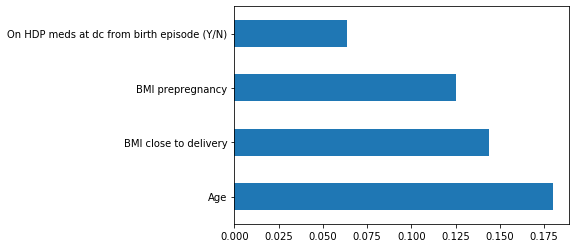

In [51]:
feat_importances = pd.Series(model.feature_importances_, index=test_x.columns)
feat_importances.nlargest(4).plot(kind='barh')

In [52]:


from sklearn.metrics import confusion_matrix,classification_report,roc_curve,precision_recall_curve,auc
from prettytable import PrettyTable



from sklearn.preprocessing import StandardScaler
colnames = train_x.columns


table2 = PrettyTable()
table2.field_names = ["Fold","Class", "precision", "recall", "f-1 score","sensitivity","specificity","Accuracy of expt","AUC","PRAUC"]


In [53]:
table2 = get_metrics(test_y,predictions,table2,1)

AUC score is 0.6957894736842105 PR-AUC score is 0.8135664335664335
Accuracy :  0.7045454545454546
Sensitivity :  0.631578947368421
Specificity :  0.76


NameError: name 'avg_auc' is not defined

In [ ]:
table2

(+------+--------------+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+--------------------+--------------------+
 | Fold |    Class     |     precision      |       recall       |     f-1 score      |    sensitivity     | specificity |  Accuracy of expt  |        AUC         |       PRAUC        |
 +------+--------------+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+--------------------+--------------------+
 |  1   | NO Readmissn |        0.9         | 0.9473684210526315 | 0.9230769230769231 | 0.9473684210526315 |     0.92    | 0.9318181818181818 | 0.9336842105263158 | 0.9618939393939395 |
 |  1   |  Readmissn   | 0.9583333333333334 |        0.92        | 0.9387755102040817 | 0.9473684210526315 |     0.92    | 0.9318181818181818 | 0.9336842105263158 | 0.9618939393939395 |
 +------+--------------+--------------------+--------------------+----

In [57]:
import pickle

In [58]:
saved_pickle_model = pickle.load(open('rforest.pickle','rb'))

/usr/lib/python3/dist-packages/sklearn/base.py:313: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:313: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [59]:
test_x = test_x.loc[:, ~test_x.columns.isin(['ZIP_4','Zipcode_last4','ZIPCODE','Mixed (Asian, White, AA)','Mixed (Asian, White)','Asian','AA','Hispanic','White','Middle Eastern','Fiscal Year'])]


preds =saved_pickle_model.predict(test_x)



from sklearn.metrics import confusion_matrix,classification_report,roc_curve,precision_recall_curve,auc
from prettytable import PrettyTable



from sklearn.preprocessing import StandardScaler
colnames = train_x.columns


table3 = PrettyTable()
table3.field_names = ["Fold","Class", "precision", "recall", "f-1 score","sensitivity","specificity","Accuracy of expt","AUC","PRAUC"]
table3 = get_metrics(test_y,preds,table3,1)


AttributeError: 'DecisionTreeClassifier' object has no attribute 'n_features_'

In [56]:
table3

NameError: name 'table3' is not defined

In [46]:
!ls
cal_sdoh = pd.read_csv('cal_sdoh_useful.csv')
adi_with_avgstateranks = pd.read_csv('adi_with_avgstateranks.csv')

 adi_with_avgstateranks.csv
'CA_2020_ADI_9 Digit Zip Code_v3.2.csv'
 cal_sdoh_useful.csv
 modeling.ipynb
 rforest.pickle
 SDOH_2020_ZIPCODE_1_0.xlsx
 sdoh_modeling.ipynb
 socialDetJoin.ipynb
 zipcode_coded.csv
'Zipcode data 070102023.xlsx'
 zipcode_with_adi_avgstaterank.csv
 zipcode_with_adi_avgstaterank_sdoh.csv
 zipcode_with_sdoh_only.csv


In [47]:
maindata

,Fiscal Year,Diabetes (Y/N),Meth/Cocaine use(Y/N),Readmitted (Y/N),Age,BMI prepregnancy,BMI close to delivery,On HDP meds at dc from birth episode (Y/N),"If Y, how many?",Betablocker dose at dc,...,chronic hypertension,gestational hypertension,none,preeclampsia with SF,preeclampsia without SF,superimposed with SF,superimposed with SF w/ SF,superimposed without SF,N_ECG,Y_ECG
0,2021,1,0,1,38.0,28.100000,35.10,0.0,0.0,0,...,False,True,False,False,False,False,False,False,False,True
1,2021,0,0,1,34.0,24.300000,32.90,1.0,1.0,0,...,False,False,False,True,False,False,False,False,False,True
2,2021,0,0,1,31.0,20.300000,26.00,0.0,0.0,0,...,False,False,False,False,False,False,False,False,False,True
3,2021,1,0,1,33.0,28.300000,31.40,1.0,2.0,1200,...,False,False,False,False,False,True,False,False,True,False
4,2021,1,0,1,44.0,30.558838,29.20,0.0,0.0,0,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,2023,1,0,0,29.0,49.450000,48.34,0.0,0.0,0,...,False,True,False,False,False,False,False,False,True,False
341,2023,1,0,0,38.0,44.390000,49.57,0.0,0.0,0,...,False,True,False,False,False,False,False,False,True,False
342,2023,0,0,0,29.0,21.370000,27.47,0.0,0.0,0,...,True,False,False,False,False,False,False,False,True,False
343,2023,0,0,0,37.0,32.920000,35.11,0.0,0.0,0,...,False,True,False,False,False,False,False,False,True,False


In [48]:
cal_sdoh

,Unnamed: 0,YEAR,STATEFIPS,ZIPCODE,ZCTA,STATE,REGION,ACS_TOT_POP_WT_ZC,ACS_TOT_POP_US_ABOVE1_ZC,ACS_TOT_POP_ABOVE5_ZC,...,CEN_POPDENSITY_ZC,HIFLD_DIST_UC_ZP,POS_DIST_ED_ZP,POS_DIST_MEDSURG_ICU_ZP,POS_DIST_TRAUMA_ZP,POS_DIST_PED_ICU_ZP,POS_DIST_OBSTETRICS_ZP,POS_DIST_CLINIC_ZP,POS_DIST_ALC_ZP,CEN_AIAN_NH_IND
0,0,2020,6,93928,NaN,California,NaN,NaN,NaN,NaN,...,NaN,26.02,19.44,19.44,56.02,96.97,19.44,19.17,53.74,NaN
1,1,2020,6,95836,NaN,California,NaN,NaN,NaN,NaN,...,NaN,6.58,10.30,10.30,12.87,12.32,12.32,9.29,10.30,NaN
2,2,2020,6,91023,NaN,California,NaN,NaN,NaN,NaN,...,NaN,5.72,4.29,4.29,7.92,7.92,6.47,6.86,4.29,NaN
3,3,2020,6,93581,NaN,California,NaN,NaN,NaN,NaN,...,NaN,33.30,0.24,33.29,33.29,35.91,33.29,0.83,35.69,NaN
4,4,2020,6,93530,NaN,California,NaN,NaN,NaN,NaN,...,NaN,78.62,20.67,41.74,84.90,83.12,20.67,20.69,76.99,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2580,2580,2020,6,96152,96150.0,California,West,30369.0,30169.0,29007.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2581,2581,2020,6,96151,96150.0,California,West,30369.0,30169.0,29007.0,...,NaN,2.76,2.88,2.88,2.88,2.88,2.88,2.81,20.82,0.0
2582,2582,2020,6,96150,96150.0,California,West,30369.0,30169.0,29007.0,...,NaN,0.65,0.56,0.56,0.56,0.56,0.56,0.50,22.68,0.0
2583,2583,2020,6,96161,96161.0,California,West,18782.0,18658.0,17737.0,...,NaN,1.12,1.05,1.05,24.59,24.59,1.05,0.99,23.58,0.0


In [49]:
adi_with_avgstateranks

,ZIP_4,GISJOIN,FIPS,ADI_NATRANK,ADI_STATERANK,TYPE,Avg_State_Rank
0,900010192,G06003702393301,6.037239e+10,27.0,8.0,,7.681788
1,900010191,G06003702393301,6.037239e+10,27.0,8.0,,7.681788
2,900010200,G06003702393301,6.037239e+10,27.0,8.0,,7.681788
3,900010201,G06003702393301,6.037239e+10,27.0,8.0,,7.681788
4,900010202,G06003702393301,6.037239e+10,27.0,8.0,,7.681788
...,...,...,...,...,...,...,...
5862559,976353049,G41003709602006,4.103796e+11,50.0,8.0,,8.000000
5862560,976359700,G41003709602006,4.103796e+11,50.0,8.0,,8.000000
5862561,976359701,G41003709602006,4.103796e+11,50.0,8.0,,8.000000
5862562,976359703,G41003709602006,4.103796e+11,50.0,8.0,,8.000000


In [50]:
maindata['ZIP_4'] = maindata['ZIP_4'].astype('Int64')
adi_with_avgstateranks['ZIP_4'] = adi_with_avgstateranks['ZIP_4'].astype('Int64')


In [51]:
maindata

,Fiscal Year,Diabetes (Y/N),Meth/Cocaine use(Y/N),Readmitted (Y/N),Age,BMI prepregnancy,BMI close to delivery,On HDP meds at dc from birth episode (Y/N),"If Y, how many?",Betablocker dose at dc,...,chronic hypertension,gestational hypertension,none,preeclampsia with SF,preeclampsia without SF,superimposed with SF,superimposed with SF w/ SF,superimposed without SF,N_ECG,Y_ECG
0,2021,1,0,1,38.0,28.100000,35.10,0.0,0.0,0,...,False,True,False,False,False,False,False,False,False,True
1,2021,0,0,1,34.0,24.300000,32.90,1.0,1.0,0,...,False,False,False,True,False,False,False,False,False,True
2,2021,0,0,1,31.0,20.300000,26.00,0.0,0.0,0,...,False,False,False,False,False,False,False,False,False,True
3,2021,1,0,1,33.0,28.300000,31.40,1.0,2.0,1200,...,False,False,False,False,False,True,False,False,True,False
4,2021,1,0,1,44.0,30.558838,29.20,0.0,0.0,0,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,2023,1,0,0,29.0,49.450000,48.34,0.0,0.0,0,...,False,True,False,False,False,False,False,False,True,False
341,2023,1,0,0,38.0,44.390000,49.57,0.0,0.0,0,...,False,True,False,False,False,False,False,False,True,False
342,2023,0,0,0,29.0,21.370000,27.47,0.0,0.0,0,...,True,False,False,False,False,False,False,False,True,False
343,2023,0,0,0,37.0,32.920000,35.11,0.0,0.0,0,...,False,True,False,False,False,False,False,False,True,False


In [52]:
maindata[maindata['ZIP_4']==-1000]

,Fiscal Year,Diabetes (Y/N),Meth/Cocaine use(Y/N),Readmitted (Y/N),Age,BMI prepregnancy,BMI close to delivery,On HDP meds at dc from birth episode (Y/N),"If Y, how many?",Betablocker dose at dc,...,chronic hypertension,gestational hypertension,none,preeclampsia with SF,preeclampsia without SF,superimposed with SF,superimposed with SF w/ SF,superimposed without SF,N_ECG,Y_ECG
2,2021,0,0,1,31.0,20.300000,26.00,0.0,0.0,0,...,False,False,False,False,False,False,False,False,False,True
3,2021,1,0,1,33.0,28.300000,31.40,1.0,2.0,1200,...,False,False,False,False,False,True,False,False,True,False
4,2021,1,0,1,44.0,30.558838,29.20,0.0,0.0,0,...,False,True,False,False,False,False,False,False,True,False
5,2021,0,0,1,33.0,29.600000,36.20,0.0,0.0,0,...,False,True,False,False,False,False,False,False,False,True
7,2021,1,0,1,30.0,27.800000,32.90,0.0,0.0,0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,2023,0,0,0,15.0,30.558838,20.15,1.0,1.0,400,...,False,False,False,True,False,False,False,False,False,True
293,2023,0,0,0,32.0,30.500000,34.60,0.0,0.0,0,...,True,False,False,False,False,False,False,False,True,False
302,2023,0,0,0,39.0,20.490000,22.04,1.0,1.0,0,...,False,False,False,True,False,False,False,False,True,False
308,2023,0,0,0,29.0,30.558838,44.33,1.0,1.0,400,...,False,False,False,False,False,False,True,False,False,True


In [53]:
maindata_with_adi= maindata.merge(adi_with_avgstateranks, on='ZIP_4', how='left')

In [54]:
maindata_with_adi[maindata_with_adi['ZIP_4'].isna()]

,Fiscal Year,Diabetes (Y/N),Meth/Cocaine use(Y/N),Readmitted (Y/N),Age,BMI prepregnancy,BMI close to delivery,On HDP meds at dc from birth episode (Y/N),"If Y, how many?",Betablocker dose at dc,...,superimposed with SF w/ SF,superimposed without SF,N_ECG,Y_ECG,GISJOIN,FIPS,ADI_NATRANK,ADI_STATERANK,TYPE,Avg_State_Rank


In [55]:
maindata_with_adi[maindata_with_adi['ZIP_4']==-1000]['ZIPCODE']


2      95678.0
3      95822.0
4      95833.0
5      95651.0
7      95835.0
        ...   
292    96130.0
293    95695.0
302    95824.0
308    95953.0
321    95823.0
Name: ZIPCODE, Length: 228, dtype: float64

In [56]:
# adi_with_avgstateranks['ZIP_4'] = adi_with_avgstateranks['ZIP_4']
adi_with_avgstateranks.loc[adi_with_avgstateranks[adi_with_avgstateranks['ZIP_4'].astype('str').str[:5]=='95678'].index[0],'Avg_State_Rank']

7.557058487330919

In [47]:
adi_with_avgstateranks.loc[adi_with_avgstateranks[adi_with_avgstateranks['ZIP_4'].astype('str').str[:5]=='95835'].index[0],'Avg_State_Rank']

6.596323529411765

In [48]:
maindata_with_adi[maindata_with_adi['ZIP_4']==-1000]



,Fiscal Year,Diabetes (Y/N),Meth/Cocaine use(Y/N),Readmitted (Y/N),Age,BMI prepregnancy,BMI close to delivery,On HDP meds at dc from birth episode (Y/N),"If Y, how many?",Betablocker dose at dc,...,superimposed with SF w/ SF,superimposed without SF,N_ECG,Y_ECG,GISJOIN,FIPS,ADI_NATRANK,ADI_STATERANK,TYPE,Avg_State_Rank
2,2021,0,0,1,31.0,20.3000,26.00,0.0,0.0,0,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,1,0,1,33.0,28.3000,31.40,1.0,2.0,1200,...,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,1,0,1,44.0,30.1843,29.20,0.0,0.0,0,...,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2021,0,0,1,33.0,29.6000,36.20,0.0,0.0,0,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
7,2021,1,0,1,30.0,27.8000,32.90,0.0,0.0,0,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,2023,0,0,0,32.0,32.1000,35.50,1.0,2.0,400,...,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
132,2023,0,0,0,37.0,21.8000,26.10,0.0,0.0,0,...,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
133,2023,0,0,1,39.0,20.1000,25.30,0.0,0.0,0,...,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
134,2023,0,0,0,32.0,30.5000,34.60,0.0,0.0,0,...,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
maindata_with_adi[maindata_with_adi['ADI_STATERANK'].isna()]

,Fiscal Year,Diabetes (Y/N),Meth/Cocaine use(Y/N),Readmitted (Y/N),Age,BMI prepregnancy,BMI close to delivery,On HDP meds at dc from birth episode (Y/N),"If Y, how many?",Betablocker dose at dc,...,superimposed with SF w/ SF,superimposed without SF,N_ECG,Y_ECG,GISJOIN,FIPS,ADI_NATRANK,ADI_STATERANK,TYPE,Avg_State_Rank
2,2021,0,0,1,31.0,20.300000,26.00,0.0,0.0,0,...,False,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,1,0,1,33.0,28.300000,31.40,1.0,2.0,1200,...,False,False,True,False,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,1,0,1,44.0,30.558838,29.20,0.0,0.0,0,...,False,False,True,False,NaN,NaN,NaN,NaN,NaN,NaN
5,2021,0,0,1,33.0,29.600000,36.20,0.0,0.0,0,...,False,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN
7,2021,1,0,1,30.0,27.800000,32.90,0.0,0.0,0,...,False,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,2023,1,0,0,20.0,30.558838,45.54,0.0,0.0,0,...,False,False,True,False,NaN,NaN,NaN,NaN,NaN,NaN
322,2023,0,0,0,32.0,22.920000,28.56,0.0,0.0,0,...,False,False,True,False,NaN,NaN,NaN,NaN,NaN,NaN
328,2023,0,0,0,38.0,25.650000,27.56,1.0,2.0,1200,...,False,False,True,False,NaN,NaN,NaN,NaN,NaN,NaN
331,2023,0,0,0,33.0,24.710000,29.37,0.0,0.0,0,...,False,False,True,False,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
maindata_with_adi[maindata_with_adi['ZIP_4']==-1000]['ZIPCODE']
maindata_with_adi['ADI_STATERANK'] = maindata_with_adi['ADI_STATERANK'].replace(to_replace ='nan', value = np.nan)
maindata_with_adi['ADI_STATERANK'] = maindata_with_adi['ADI_STATERANK'].replace(to_replace ='NaN', value = np.nan)
indices = maindata_with_adi[maindata_with_adi['ADI_STATERANK'].isna()].index
print(indices)
meow = maindata_with_adi.loc[2,'ADI_STATERANK']
print(meow)
maindata_with_adi['ADI_STATERANK'] = maindata_with_adi['ADI_STATERANK'].replace(to_replace =meow, value = np.nan)



Int64Index([  2,   3,   4,   5,   7,   8,   9,  10,  12,  13,
            ...
            292, 293, 302, 308, 316, 321, 322, 328, 331, 341],
           dtype='int64', length=238)
nan


In [127]:
type(maindata_with_adi['ADI_STATERANK'].unique()[4])

numpy.float64

In [62]:
maindata_with_adi['ADI_STATERANK'].unique()

array([10.,  8.,  0.,  7.,  6.,  9.,  4.,  3.,  5.])

In [61]:
maindata_with_adi['ADI_STATERANK'] = maindata_with_adi['ADI_STATERANK'].fillna(0)

In [130]:
type(np.float64(np.nan))

numpy.float64

In [64]:
tempzipavgstaterank = pd.read_csv('zipcode_with_adi_avgstaterank.csv')
tempzipavgstaterank['ADI_STATERANK']

0      10.000000
1       8.000000
2       7.557058
3       7.957015
4       8.239848
         ...    
143     3.000000
144    10.000000
145    10.000000
146     9.000000
147     3.000000
Name: ADI_STATERANK, Length: 148, dtype: float64

In [69]:
for index,row in maindata_with_adi.iterrows():
    print(index,row['ADI_STATERANK'])
    if maindata_with_adi.loc[index,'ADI_STATERANK']==0:
        try:
            print("found it")
            maindata_with_adi.loc[index,'ADI_STATERANK']=tempzipavgstaterank.loc[tempzipavgstaterank[tempzipavgstaterank['ZIPCODE']==row['ZIPCODE']].index,'ADI_STATERANK']
        except:
            print("somehtingf")#,adi_with_avgstateranks.loc[adi_with_avgstateranks[adi_with_avgstateranks['ZIP_4'].astype('str').str[:5]==str(row['ZIPCODE'])[:5]].index[0],'Avg_State_Rank'])
            try:
                maindata_with_adi.loc[index,'ADI_STATERANK'] = adi_with_avgstateranks.loc[adi_with_avgstateranks[adi_with_avgstateranks['ZIP_4'].astype('str').str[:5]==str(row['ZIPCODE'])[:5]].index[0],'Avg_State_Rank'] 
            except:
                print("no 5 digit zip code")
    print(index,maindata_with_adi.loc[index,'ADI_STATERANK'])
    

0 10.0
0 10.0
1 8.0
1 8.0
2 7.557058487330919
2 7.557058487330919
3 7.957015258652773
3 7.957015258652773
4 8.239848197343454
4 8.239848197343454
5 8.0
5 8.0
6 7.0
6 7.0
7 6.596323529411764
7 6.596323529411764
8 8.309903560830861
8 8.309903560830861
9 9.657929226736568
9 9.657929226736568
10 8.386861313868613
10 8.386861313868613
11 10.0
11 10.0
12 4.197401508801341
12 4.197401508801341
13 7.49887784546329
13 7.49887784546329
14 8.318854265029902
14 8.318854265029902
15 6.871257485029941
15 6.871257485029941
16 6.0
16 6.0
17 7.577786935915928
17 7.577786935915928
18 6.826902173913044
18 6.826902173913044
19 6.647077018249305
19 6.647077018249305
20 7.577786935915928
20 7.577786935915928
21 9.354277286135694
21 9.354277286135694
22 4.123595505617978
22 4.123595505617978
23 6.239339752407153
23 6.239339752407153
24 8.686084142394822
24 8.686084142394822
25 8.928152492668621
25 8.928152492668621
26 7.2864015848309025
26 7.2864015848309025
27 9.0
27 9.0
28 9.286795048143054
28 9.2867950481

In [73]:
maindata_with_adi[maindata_with_adi['ADI_STATERANK']==0]
maindata_with_adi['ADI_STATERANK'] = maindata_with_adi['ADI_STATERANK'].replace(to_replace =0, value = np.nan)
# maindata_with_adi[maindata_with_adi['ADI_STATERANK']==-1000]



In [142]:
maindata_with_adi['ADI_STATERANK'] = maindata_with_adi['ADI_STATERANK'].replace(to_replace =meow, value = -1000)



In [74]:
maindata_with_adi['ADI_STATERANK'].unique()

array([10.        ,  8.        ,  7.55705849,  7.95701526,  8.2398482 ,
        7.        ,  6.59632353,  8.30990356,  9.65792923,  8.38686131,
        4.19740151,  7.49887785,  8.31885427,  6.87125749,  6.        ,
        7.57778694,  6.82690217,  6.64707702,  9.35427729,  4.12359551,
        6.23933975,  8.68608414,  8.92815249,  7.28640158,  9.        ,
        9.28679505,  5.4550706 ,  4.        ,         nan,  7.28637951,
        3.        ,  3.2081448 ,  5.        ,  9.6918312 ,  9.27850877,
        8.06151142,  7.71459024,  8.10056031,  6.28580991,  8.01839685,
        6.75611052,  8.99165379,  6.90115321,  5.60298351,  7.24635569,
        6.3356445 ,  7.08078176,  4.46062053,  8.81328546,  5.45050553,
        9.31961591,  5.64181818,  9.30394589,  4.44472362,  8.95903084,
        6.13745131,  8.5892587 ,  9.04221636,  6.88967391,  4.03253652,
        7.26819127,  4.12006465,  5.69741125,  3.03745819,  9.02986667,
        5.16575813,  8.5890971 ,  7.90898749,  5.65393795,  7.16

In [75]:
maindata_with_adi.to_csv("fullzipcode_with_adi_avgstaterank.csv",index=False)

In [76]:
maindata_with_adi.columns

Index(['Fiscal Year', 'Diabetes (Y/N)', 'Meth/Cocaine use(Y/N)',
       'Readmitted (Y/N)', 'Age', 'BMI prepregnancy', 'BMI close to delivery',
       'On HDP meds at dc from birth episode (Y/N)', 'If Y, how many?',
       'Betablocker dose at dc', 'Nifedipine dose at dc', 'Other meds at dc',
       'ZIPCODE', 'Zipcode_last4', 'ZIP_4', 'c-section', 'vaginal', 'AA',
       'Asian', 'Declined', 'Hispanic', 'Middle Eastern',
       'Mixed (Asian, White)', 'Mixed (Asian, White, AA)', 'Other', 'White',
       'A1GDM', 'A2GDM', 'N_Diabetes', 'T1', 'T1DM', 'T2DM', 'Preterm', 'Term',
       'No Induction', 'Yes Induction', 'Multiple', 'Singleton', 'N_Multips',
       'Y_Multips', 'N_HDP Diag', 'Y_HDP Diag', 'No Episode',
       'chronic hypertension', 'gestational hypertension', 'none',
       'preeclampsia with SF', 'preeclampsia without SF',
       'superimposed with SF', 'superimposed with SF w/ SF',
       'superimposed without SF', 'N_ECG', 'Y_ECG', 'GISJOIN', 'FIPS',
       'ADI_NATRANK'

In [77]:
# maindata_with_adi = maindata_with_adi.drop(['TYPE', 'Avg_State_Rank','GISJOIN', 'FIPS','Fiscal Year','ADI_NATRANK'],axis=1)
maindata_with_adi = maindata_with_adi.drop(['Fiscal Year'],axis=1)

In [84]:
cols,corr,allks,filterks = statistical_filter(maindata_with_adi,maindata_with_adi.loc[:,maindata_with_adi.columns!='Readmitted (Y/N)'],maindata_with_adi.loc[:,'Readmitted (Y/N)'],0.9)

TypeError: '<' not supported between instances of 'str' and 'float'

In [85]:
cols

NameError: name 'cols' is not defined

In [175]:
filterks

,Zipcode_last4,ZIP_4,On HDP meds at dc from birth episode (Y/N),ZIPCODE,ADI_STATERANK,BMI prepregnancy,Y_ECG,BMI close to delivery,N_ECG,Age
0,2231.0,958232231,0.0,95823.0,10.000000,28.1000,1,35.100000,0,38.0
1,9739.0,957269739,1.0,95726.0,8.000000,24.3000,1,32.900000,0,34.0
2,-1000.0,-1000,0.0,95678.0,7.557058,20.3000,1,26.000000,0,31.0
3,-1000.0,-1000,1.0,95822.0,7.957015,28.3000,0,31.400000,1,33.0
4,-1000.0,-1000,0.0,95833.0,8.239848,30.1843,0,29.200000,1,44.0
...,...,...,...,...,...,...,...,...,...,...
143,6770.0,956186770,0.0,95618.0,3.000000,28.0300,0,34.240000,1,37.0
144,2634.0,958242634,0.0,95824.0,10.000000,29.1000,0,32.910000,1,28.0
145,9409.0,954229409,1.0,95422.0,10.000000,30.1843,0,34.962377,1,29.0
146,2745.0,958422745,0.0,95842.0,9.000000,49.4500,0,48.340000,1,29.0


In [176]:
corr

,Feature A,Feature B,Correlation values (-1 to +1)
0,ZIPCODE,On HDP meds at dc from birth episode (Y/N),0.988292
1,ADI_STATERANK,On HDP meds at dc from birth episode (Y/N),0.975022
2,ADI_STATERANK,ZIPCODE,0.997477
3,BMI close to delivery,BMI prepregnancy,0.928467
4,N_ECG,Y_ECG,-0.983631


In [200]:
maindata_with_adi

,Diabetes (Y/N),Meth/Cocaine use(Y/N),Readmitted (Y/N),Age,BMI prepregnancy,BMI close to delivery,On HDP meds at dc from birth episode (Y/N),"If Y, how many?",Betablocker dose at dc,Nifedipine dose at dc,...,gestational hypertension,none,preeclampsia with SF,preeclampsia without SF,superimposed with SF,superimposed with SF w/ SF,superimposed without SF,N_ECG,Y_ECG,ADI_STATERANK
0,1,0,1,38.0,28.1000,35.100000,0.0,0.0,0,0,...,1,0,0,0,0,0,0,0,1,10.000000
1,0,0,1,34.0,24.3000,32.900000,1.0,1.0,0,60,...,0,0,1,0,0,0,0,0,1,8.000000
2,0,0,1,31.0,20.3000,26.000000,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,7.557058
3,1,0,1,33.0,28.3000,31.400000,1.0,2.0,1200,30,...,0,0,0,0,1,0,0,1,0,7.957015
4,1,0,1,44.0,30.1843,29.200000,0.0,0.0,0,0,...,1,0,0,0,0,0,0,1,0,8.239848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,0,0,1,37.0,28.0300,34.240000,0.0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,3.000000
144,0,0,0,28.0,29.1000,32.910000,0.0,0.0,0,0,...,1,0,0,0,0,0,0,1,0,10.000000
145,0,0,1,29.0,30.1843,34.962377,1.0,1.0,0,120,...,0,0,0,0,0,1,0,1,0,10.000000
146,1,0,0,29.0,49.4500,48.340000,0.0,0.0,0,0,...,1,0,0,0,0,0,0,1,0,9.000000


In [86]:
maindata_with_adi_sdoh= maindata_with_adi.merge(cal_sdoh, on='ZIPCODE', how='left')

In [87]:
maindata_with_adi_sdoh

,Diabetes (Y/N),Meth/Cocaine use(Y/N),Readmitted (Y/N),Age,BMI prepregnancy,BMI close to delivery,On HDP meds at dc from birth episode (Y/N),"If Y, how many?",Betablocker dose at dc,Nifedipine dose at dc,...,CEN_POPDENSITY_ZC,HIFLD_DIST_UC_ZP,POS_DIST_ED_ZP,POS_DIST_MEDSURG_ICU_ZP,POS_DIST_TRAUMA_ZP,POS_DIST_PED_ICU_ZP,POS_DIST_OBSTETRICS_ZP,POS_DIST_CLINIC_ZP,POS_DIST_ALC_ZP,CEN_AIAN_NH_IND
0,1,0,1,38.0,28.100000,35.10,0.0,0.0,0,0,...,NaN,1.75,1.11,1.11,1.11,5.22,1.11,1.07,1.56,0.0
1,0,0,1,34.0,24.300000,32.90,1.0,1.0,0,60,...,NaN,23.11,11.20,11.20,33.58,33.58,11.20,6.82,37.17,0.0
2,0,0,1,31.0,20.300000,26.00,0.0,0.0,0,0,...,NaN,1.55,2.19,2.19,2.19,2.30,2.19,7.62,1.88,0.0
3,1,0,1,33.0,28.300000,31.40,1.0,2.0,1200,30,...,NaN,1.34,3.46,3.46,3.43,3.43,3.46,1.73,5.07,0.0
4,1,0,1,44.0,30.558838,29.20,0.0,0.0,0,0,...,NaN,2.17,2.44,2.44,4.89,3.61,3.61,2.36,2.44,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,1,0,0,29.0,49.450000,48.34,0.0,0.0,0,0,...,NaN,1.76,2.43,2.43,2.43,6.17,2.43,1.81,4.70,0.0
341,1,0,0,38.0,44.390000,49.57,0.0,0.0,0,0,...,NaN,6.20,5.64,7.25,7.47,8.41,7.25,10.35,5.64,0.0
342,0,0,0,29.0,21.370000,27.47,0.0,0.0,0,0,...,NaN,0.95,0.93,0.93,9.25,15.66,0.93,0.91,9.25,0.0
343,0,0,0,37.0,32.920000,35.11,0.0,0.0,0,0,...,NaN,3.53,3.78,4.32,4.79,5.90,4.32,7.40,3.78,0.0


In [88]:
!ls
maindata_with_adi_sdoh = maindata_with_adi_sdoh.drop('Unnamed: 0',axis=1)
maindata_with_adi_sdoh.to_csv('fullzipcode_with_adi_avgstaterank_sdoh.csv',index=False)

 adi_with_avgstateranks.csv
'CA_2020_ADI_9 Digit Zip Code_v3.2.csv'
 cal_sdoh_useful.csv
 fullzipcode_with_adi_avgstaterank.csv
 modeling.ipynb
 rforest.pickle
 SDOH_2020_ZIPCODE_1_0.xlsx
 sdoh_modeling.ipynb
 socialDetJoin.ipynb
 zipcode_coded.csv
'Zipcode data 070102023.xlsx'
 zipcode_with_adi_avgstaterank.csv
 zipcode_with_adi_avgstaterank_sdoh.csv
 zipcode_with_sdoh_only.csv


In [89]:
maindata_with_adi_sdoh

,Diabetes (Y/N),Meth/Cocaine use(Y/N),Readmitted (Y/N),Age,BMI prepregnancy,BMI close to delivery,On HDP meds at dc from birth episode (Y/N),"If Y, how many?",Betablocker dose at dc,Nifedipine dose at dc,...,CEN_POPDENSITY_ZC,HIFLD_DIST_UC_ZP,POS_DIST_ED_ZP,POS_DIST_MEDSURG_ICU_ZP,POS_DIST_TRAUMA_ZP,POS_DIST_PED_ICU_ZP,POS_DIST_OBSTETRICS_ZP,POS_DIST_CLINIC_ZP,POS_DIST_ALC_ZP,CEN_AIAN_NH_IND
0,1,0,1,38.0,28.100000,35.10,0.0,0.0,0,0,...,NaN,1.75,1.11,1.11,1.11,5.22,1.11,1.07,1.56,0.0
1,0,0,1,34.0,24.300000,32.90,1.0,1.0,0,60,...,NaN,23.11,11.20,11.20,33.58,33.58,11.20,6.82,37.17,0.0
2,0,0,1,31.0,20.300000,26.00,0.0,0.0,0,0,...,NaN,1.55,2.19,2.19,2.19,2.30,2.19,7.62,1.88,0.0
3,1,0,1,33.0,28.300000,31.40,1.0,2.0,1200,30,...,NaN,1.34,3.46,3.46,3.43,3.43,3.46,1.73,5.07,0.0
4,1,0,1,44.0,30.558838,29.20,0.0,0.0,0,0,...,NaN,2.17,2.44,2.44,4.89,3.61,3.61,2.36,2.44,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,1,0,0,29.0,49.450000,48.34,0.0,0.0,0,0,...,NaN,1.76,2.43,2.43,2.43,6.17,2.43,1.81,4.70,0.0
341,1,0,0,38.0,44.390000,49.57,0.0,0.0,0,0,...,NaN,6.20,5.64,7.25,7.47,8.41,7.25,10.35,5.64,0.0
342,0,0,0,29.0,21.370000,27.47,0.0,0.0,0,0,...,NaN,0.95,0.93,0.93,9.25,15.66,0.93,0.91,9.25,0.0
343,0,0,0,37.0,32.920000,35.11,0.0,0.0,0,0,...,NaN,3.53,3.78,4.32,4.79,5.90,4.32,7.40,3.78,0.0


In [212]:
pd.options.display.max_rows = 400
maindata_with_adi_sdoh.isna().sum()

Diabetes (Y/N)                                  0
Meth/Cocaine use(Y/N)                           0
Readmitted (Y/N)                                0
Age                                             0
BMI prepregnancy                                0
BMI close to delivery                           0
On HDP meds at dc from birth episode (Y/N)      0
If Y, how many?                                 0
Betablocker dose at dc                          0
Nifedipine dose at dc                           0
Other meds at dc                                0
ZIPCODE                                         0
Zipcode_last4                                   0
ZIP_4                                           0
c-section                                       0
vaginal                                         0
AA                                              0
Asian                                           0
Declined                                        0
Hispanic                                        0


In [90]:
cols_with_high_missing = maindata_with_adi_sdoh.columns[maindata_with_adi_sdoh.isna().sum()>100]
cols_with_high_missing

Index(['GISJOIN', 'FIPS', 'ADI_NATRANK', 'TYPE', 'Avg_State_Rank',
       'ACS_MDN_GRNDPRNT_NO_PRNT_INC_ZC', 'ACS_MDN_GRNDPRNT_INC_ZC',
       'ACS_MEDIAN_HH_INC_AIAN_ZC', 'ACS_MEDIAN_HH_INC_BLACK_ZC',
       'ACS_MEDIAN_HH_INC_NHPI_ZC', 'ACS_MEDIAN_HH_INC_OTHER_ZC',
       'CEN_AREALAND_SQM_ZC', 'CEN_POPDENSITY_ZC'],
      dtype='object')

In [219]:
maindata_with_adi_sdoh.drop(cols_with_high_missing,axis=1)

,Diabetes (Y/N),Meth/Cocaine use(Y/N),Readmitted (Y/N),Age,BMI prepregnancy,BMI close to delivery,On HDP meds at dc from birth episode (Y/N),"If Y, how many?",Betablocker dose at dc,Nifedipine dose at dc,...,ACS_PCT_UNINSURED_BELOW64_ZC,HIFLD_DIST_UC_ZP,POS_DIST_ED_ZP,POS_DIST_MEDSURG_ICU_ZP,POS_DIST_TRAUMA_ZP,POS_DIST_PED_ICU_ZP,POS_DIST_OBSTETRICS_ZP,POS_DIST_CLINIC_ZP,POS_DIST_ALC_ZP,CEN_AIAN_NH_IND
0,1,0,1,38.000,28.1000,35.100000,0.0,0.0,0,0,...,8.08,1.75,1.11,1.11,1.11,5.22,1.11,1.07,1.56,0.0
1,0,0,1,34.000,24.3000,32.900000,1.0,1.0,0,60,...,2.13,23.11,11.20,11.20,33.58,33.58,11.20,6.82,37.17,0.0
2,0,0,1,31.000,20.3000,26.000000,0.0,0.0,0,0,...,5.67,1.55,2.19,2.19,2.19,2.30,2.19,7.62,1.88,0.0
3,1,0,1,33.000,28.3000,31.400000,1.0,2.0,1200,30,...,7.19,1.34,3.46,3.46,3.43,3.43,3.46,1.73,5.07,0.0
4,1,0,1,44.000,30.1843,29.200000,0.0,0.0,0,0,...,6.54,2.17,2.44,2.44,4.89,3.61,3.61,2.36,2.44,0.0
5,0,0,1,33.000,29.6000,36.200000,0.0,0.0,0,0,...,6.45,10.34,9.33,9.33,17.49,17.67,9.33,8.80,20.00,0.0
6,0,0,1,32.000,24.6000,30.500000,1.0,1.0,0,30,...,5.61,1.38,3.55,3.55,4.23,3.55,3.55,3.93,1.94,0.0
7,1,0,1,30.000,27.8000,32.900000,0.0,0.0,0,0,...,3.32,1.83,5.38,5.38,8.67,7.40,7.40,4.83,5.38,0.0
8,1,0,1,26.000,24.0000,27.400000,0.0,1.0,0,0,...,11.45,87.61,0.70,0.70,45.83,37.11,0.70,0.60,45.83,0.0
9,0,0,1,35.000,85.0000,92.600000,1.0,1.0,400,0,...,12.25,3.59,0.69,0.69,1.49,39.93,0.69,1.43,1.80,0.0


In [106]:
import pandas as pd
import numpy as np
maindata_with_adi_sdoh = pd.read_csv('fullzipcode_with_adi_avgstaterank_sdoh.csv')

In [107]:
maindata_with_adi_sdoh.head()

,Diabetes (Y/N),Meth/Cocaine use(Y/N),Readmitted (Y/N),Age,BMI prepregnancy,BMI close to delivery,On HDP meds at dc from birth episode (Y/N),"If Y, how many?",Betablocker dose at dc,Nifedipine dose at dc,...,CEN_POPDENSITY_ZC,HIFLD_DIST_UC_ZP,POS_DIST_ED_ZP,POS_DIST_MEDSURG_ICU_ZP,POS_DIST_TRAUMA_ZP,POS_DIST_PED_ICU_ZP,POS_DIST_OBSTETRICS_ZP,POS_DIST_CLINIC_ZP,POS_DIST_ALC_ZP,CEN_AIAN_NH_IND
0,1,0,1,38.0,28.100000,35.1,0.0,0.0,0,0,...,NaN,1.75,1.11,1.11,1.11,5.22,1.11,1.07,1.56,0.0
1,0,0,1,34.0,24.300000,32.9,1.0,1.0,0,60,...,NaN,23.11,11.20,11.20,33.58,33.58,11.20,6.82,37.17,0.0
2,0,0,1,31.0,20.300000,26.0,0.0,0.0,0,0,...,NaN,1.55,2.19,2.19,2.19,2.30,2.19,7.62,1.88,0.0
3,1,0,1,33.0,28.300000,31.4,1.0,2.0,1200,30,...,NaN,1.34,3.46,3.46,3.43,3.43,3.46,1.73,5.07,0.0
4,1,0,1,44.0,30.558838,29.2,0.0,0.0,0,0,...,NaN,2.17,2.44,2.44,4.89,3.61,3.61,2.36,2.44,0.0


In [108]:
cols_with_high_missing = maindata_with_adi_sdoh.columns[maindata_with_adi_sdoh.isna().sum()>100]
print("dropped columns are",cols_with_high_missing, "Before dropping no of features are",len(maindata_with_adi_sdoh.columns))
maindata_with_adi_sdoh = maindata_with_adi_sdoh.drop(cols_with_high_missing,axis=1)
print("after dropping no of features are",len(maindata_with_adi_sdoh.columns))



dropped columns are Index(['GISJOIN', 'FIPS', 'ADI_NATRANK', 'TYPE', 'Avg_State_Rank',
       'ACS_MDN_GRNDPRNT_NO_PRNT_INC_ZC', 'ACS_MDN_GRNDPRNT_INC_ZC',
       'ACS_MEDIAN_HH_INC_AIAN_ZC', 'ACS_MEDIAN_HH_INC_BLACK_ZC',
       'ACS_MEDIAN_HH_INC_NHPI_ZC', 'ACS_MEDIAN_HH_INC_OTHER_ZC',
       'CEN_AREALAND_SQM_ZC', 'CEN_POPDENSITY_ZC'],
      dtype='object') Before dropping no of features are 242
after dropping no of features are 229


In [109]:
print("before dropping zipcode based indices from data, no of samples are",len(maindata_with_adi_sdoh))
maindata_with_adi_sdoh = maindata_with_adi_sdoh.drop(maindata_with_adi_sdoh[maindata_with_adi_sdoh['ZIPCODE']==-1000]['Readmitted (Y/N)'].index)
print("after :",len(maindata_with_adi_sdoh))

before dropping zipcode based indices from data, no of samples are 345
after : 267


In [110]:
maindata_with_adi_sdoh.isna().sum()

Diabetes (Y/N)                                 0
Meth/Cocaine use(Y/N)                          0
Readmitted (Y/N)                               0
Age                                            0
BMI prepregnancy                               0
BMI close to delivery                          0
On HDP meds at dc from birth episode (Y/N)     0
If Y, how many?                                0
Betablocker dose at dc                         0
Nifedipine dose at dc                          0
Other meds at dc                               0
ZIPCODE                                        0
Zipcode_last4                                  0
ZIP_4                                          0
c-section                                      0
vaginal                                        0
AA                                             0
Asian                                          0
Declined                                       0
Hispanic                                       0
Middle Eastern      

In [64]:
maindata_with_adi_sdoh = maindata_with_adi_sdoh.replace(to_replace=-1000,value=np.nan)

maindata_with_adi_sdoh[maindata_with_adi_sdoh['ZIPCODE']==-1000]['Readmitted (Y/N)']


Series([], Name: Readmitted (Y/N), dtype: int64)

In [111]:
pd.options.display.max_rows = 400

maindata_with_adi_sdoh.isna().sum()

Diabetes (Y/N)                                 0
Meth/Cocaine use(Y/N)                          0
Readmitted (Y/N)                               0
Age                                            0
BMI prepregnancy                               0
BMI close to delivery                          0
On HDP meds at dc from birth episode (Y/N)     0
If Y, how many?                                0
Betablocker dose at dc                         0
Nifedipine dose at dc                          0
Other meds at dc                               0
ZIPCODE                                        0
Zipcode_last4                                  0
ZIP_4                                          0
c-section                                      0
vaginal                                        0
AA                                             0
Asian                                          0
Declined                                       0
Hispanic                                       0
Middle Eastern      

In [93]:
maindata_with_adi_sdoh = maindata_with_adi_sdoh.replace(to_replace=-1000,value=np.nan)


In [79]:
cols_w_missing_vals = maindata_with_adi_sdoh.columns[maindata_with_adi_sdoh.isna().sum()!=0]
cols_w_missing_vals

Index(['On HDP meds at dc from birth episode (Y/N)', 'ZIPCODE',
       'Zipcode_last4', 'ZIP_4', 'ADI_STATERANK', 'YEAR', 'STATEFIPS', 'ZCTA',
       'STATE', 'REGION',
       ...
       'ACS_PCT_UNINSURED_BELOW64_ZC', 'HIFLD_DIST_UC_ZP', 'POS_DIST_ED_ZP',
       'POS_DIST_MEDSURG_ICU_ZP', 'POS_DIST_TRAUMA_ZP', 'POS_DIST_PED_ICU_ZP',
       'POS_DIST_OBSTETRICS_ZP', 'POS_DIST_CLINIC_ZP', 'POS_DIST_ALC_ZP',
       'CEN_AIAN_NH_IND'],
      dtype='object', length=185)

In [94]:
maindata_with_adi_sdoh.isna().sum()

Diabetes (Y/N)                                  0
Meth/Cocaine use(Y/N)                           0
Readmitted (Y/N)                                0
Age                                             0
BMI prepregnancy                                0
BMI close to delivery                           0
On HDP meds at dc from birth episode (Y/N)     79
If Y, how many?                                 0
Betablocker dose at dc                          0
Nifedipine dose at dc                           0
Other meds at dc                                0
ZIPCODE                                        78
Zipcode_last4                                 228
ZIP_4                                         228
c-section                                       0
vaginal                                         0
AA                                              0
Asian                                           0
Declined                                        0
Hispanic                                        0


In [ ]:
# drop these 80 columns with no zip codes and then do train test split

In [ ]:
# np.random.seed(10)
# len(maindata[maindata['Readmitted (Y/N)']==0])-len(maindata[maindata['Readmitted (Y/N)']==1])
# #197
# remove_n = 197
# drop_indices = np.random.choice(maindata[maindata['Readmitted (Y/N)']==0].index, remove_n, replace=False)
# maindata = maindata.drop(drop_indices)
# maindata=maindata.reset_index(drop=True)


train_set = maindata.sample(frac=0.7)

#HOLD OUT TEST SET
# for testing on unseen data
test_set = maindata.loc[~maindata.index.isin(train_set.index)]

train_set=train_set.reset_index(drop=True)
test_set =test_set.reset_index(drop=True)
# train_x =  whole_cohot_ehr.loc[:, :]
train_x = train_set.loc[:, train_set.columns != 'Readmitted (Y/N)']
# train_x = train_x[train_x.deidentified_study_id<150].reset_index(drop=True)
train_y = train_set['Readmitted (Y/N)']#
# train_y = train_y[train_y.deidentified_study_id<150].reset_index(drop=True)

test_x = test_set.loc[:, test_set.columns != 'Readmitted (Y/N)']
# train_x = train_x[train_x.deidentified_study_id<150].reset_index(drop=True)
test_y = test_set['Readmitted (Y/N)']#

do_cross_validation(maindata)